In [124]:
# healthcare data analysis

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset (2).csv


In [127]:
df =pd.read_csv('healthcare_dataset.csv')
df_raw = df.copy()

In [128]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [130]:
total_rows = df.shape[0]
print("Total rows:", total_rows)

Total rows: 55500


In [131]:
total_rows, total_columns = df.shape

print("Total rows:", total_rows)
print("Total columns:", total_columns)

Total rows: 55500
Total columns: 15


In [132]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Insight for df.describe


  - Mean age for patients : 51 years old
  - Min age for patients  : 13 years old
  - Max age for Patients  : 89 years old

  - Mean Billing Amount : 25,539.32
  - Min Billing Amount  : -2,008.49
    - The minimum Billing Amount is negative due to refunds or adjustments.
  - Max Billing Amount  : 52,764.28

In [133]:
#Checking if the is negative amount in Billing Amount

df[df['Billing Amount'] < 0]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.865186,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.917419,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.663795,122,Urgent,2019-06-12,Ibuprofen,Abnormal


Insights for negative billing amount

- Out of 55,500 records, 108 rows have negative billing amounts, which correspond to refunds or adjustments.

In [134]:
#Data Cleaning start here

df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


Insights for missing value

  - The dataset contains no missing values across all columns, indicating that the data is complete and ready for further analysi

In [135]:
# Changing Data Type

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

Insights for changing data type

  - The "Date of Admission" and "Discharge Date" columns were converted from object to datetime data type to ensure accurate time-based calculations and analysis.

In [136]:
#Re-check data type

df[['Date of Admission', 'Discharge Date']].dtypes

,0
Date of Admission,datetime64[ns]
Discharge Date,datetime64[ns]


In [137]:
#Create new columns

df['Discharge Date'] - df['Date of Admission']
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

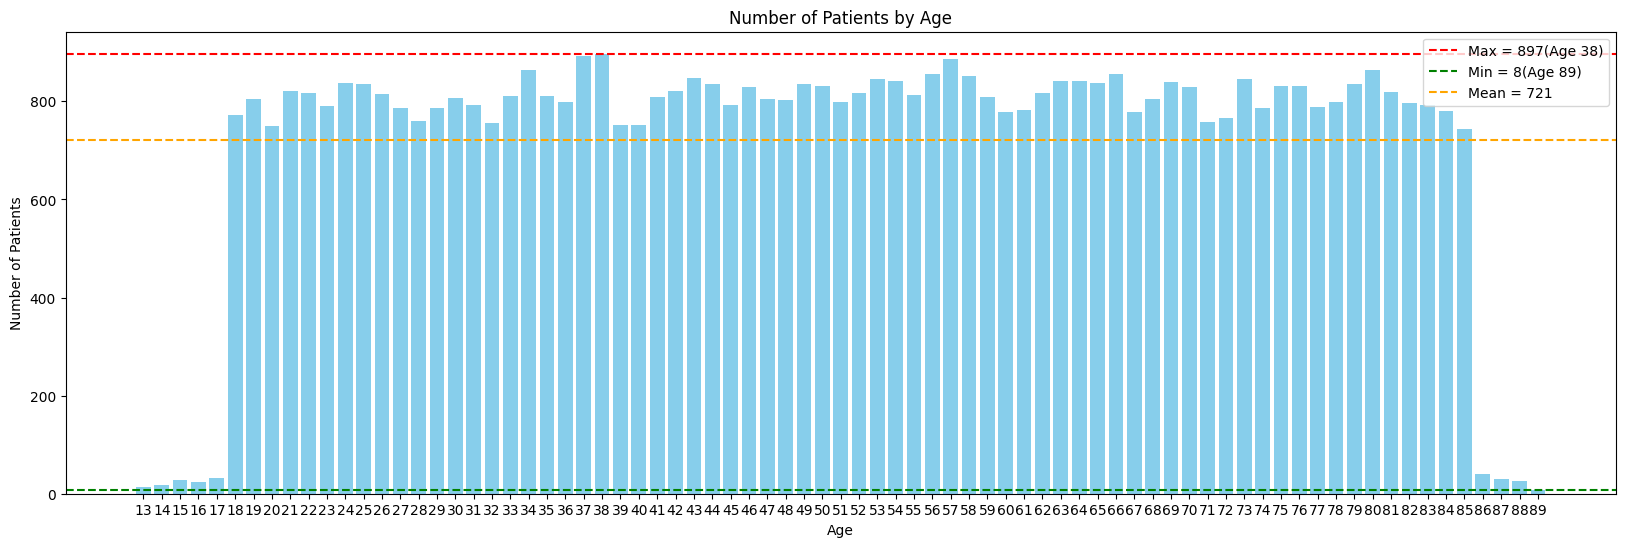

In [138]:
# Exploratory Visualisation start here

# Calculate the number of patients for each age group
age_counts = df['Age'].value_counts().sort_index()

# Calculate max, min, mean
max_count = age_counts.max()
min_count = age_counts.min()
mean_count = age_counts.mean()

max_age = age_counts.idxmax()
min_age = age_counts.idxmin()

# Plot bar chart
plt.figure(figsize=(20,6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')

# Horizontal line for mean, max, min
plt.axhline(max_count, color='red', linestyle='--', label=f'Max = {max_count:.0f}(Age {max_age})')
plt.axhline(min_count, color='green', linestyle='--', label=f'Min = {min_count:.0f}(Age {min_age})')
plt.axhline(mean_count, color='orange', linestyle='--', label=f'Mean = {mean_count:.0f}')

plt.title("Number of Patients by Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.xticks(age_counts.index)  # ensure all age shows
plt.legend()
plt.show()

Insights for Number of Patients by Age Chart

  - As shown in the chart above, the age group with the highest number of patients is 38 years, with 897 patients, whereas the age group with the lowest number of patients is 89 years, with 8 patients.

In [139]:
# Corfimation min, max and mean  count for age
age_gender_counts = df.groupby(['Age', 'Gender']).size()
max_count = age_gender_counts.max()
min_count = age_gender_counts.min()
mean_count = age_gender_counts.mean()
print("Max count:", max_count)
print("Min count:", min_count)
print('Mean count:',mean_count)

Max count: 469
Min count: 4
Mean count: 360.38961038961037


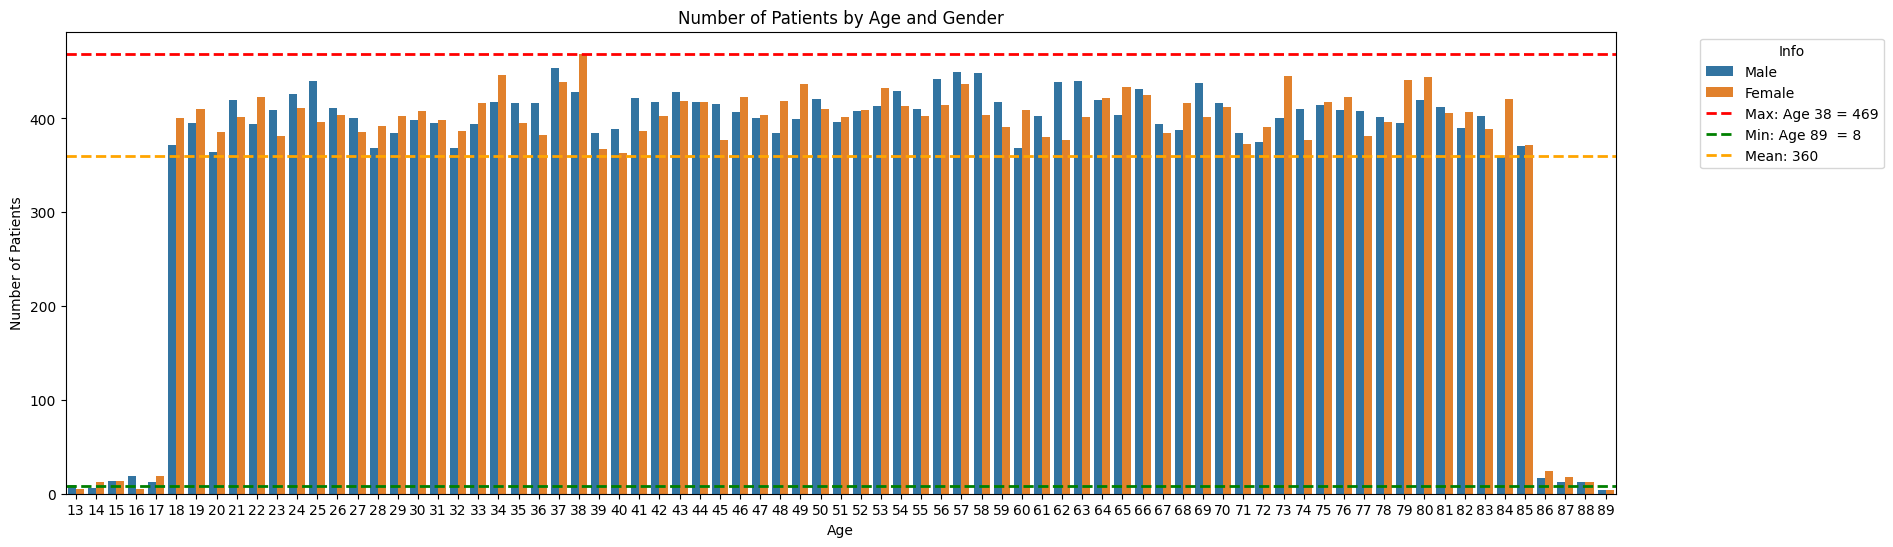

In [140]:
# Chart Age by Gender

all_combinations = pd.MultiIndex.from_product(
    [df['Age'].unique(), df['Gender'].unique()],
    names=['Age','Gender']
)

# Age count
max_age = age_counts.idxmax()      # Age with maximum count
max_count = age_counts.max()       # Maximum count

min_age = age_counts.idxmin()      # Age with minimum count
min_count = age_counts.min()       # Minimum count

age_gender_counts = df.groupby(['Age','Gender']).size().reindex(all_combinations, fill_value=0)
mean_count = age_gender_counts.mean()

# Plot chart
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Age', hue='Gender', data=df)

# Find the tallest bar (actual max in the plot)
heights = [p.get_height() for p in ax.patches]
max_bar_height = max(heights)
min_bar_height = min(heights)

bar_heights = [p.get_height() for p in ax.patches]
mean_bar_height = sum(bar_heights) / len(bar_heights)

# Draw horizontal lines at actual max/min bar heights
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2, label=f'Max: Age {max_age} = {int(max_bar_height)}')
plt.axhline(min_count, color='green', linestyle='--', linewidth=2, label=f'Min: Age {min_age}  = {int(min_count)}')
plt.axhline(mean_count, color='orange', linestyle='--', linewidth=2,
            label=f'Mean: {int(mean_count)}')
#Title and label
plt.title("Number of Patients by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
# Legend outside chart
plt.legend(title="Info", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Insights for Number of Patiens by Age and Gender

  - As shown in the chart above, the highest number of patients is in the 38-year-old age group, with 469 patients being female. Meanwhile, the 89-year-old age group has the lowest number of patients across both genders, with a total of 8 patients. The mean number of patients across all age groups is 360.

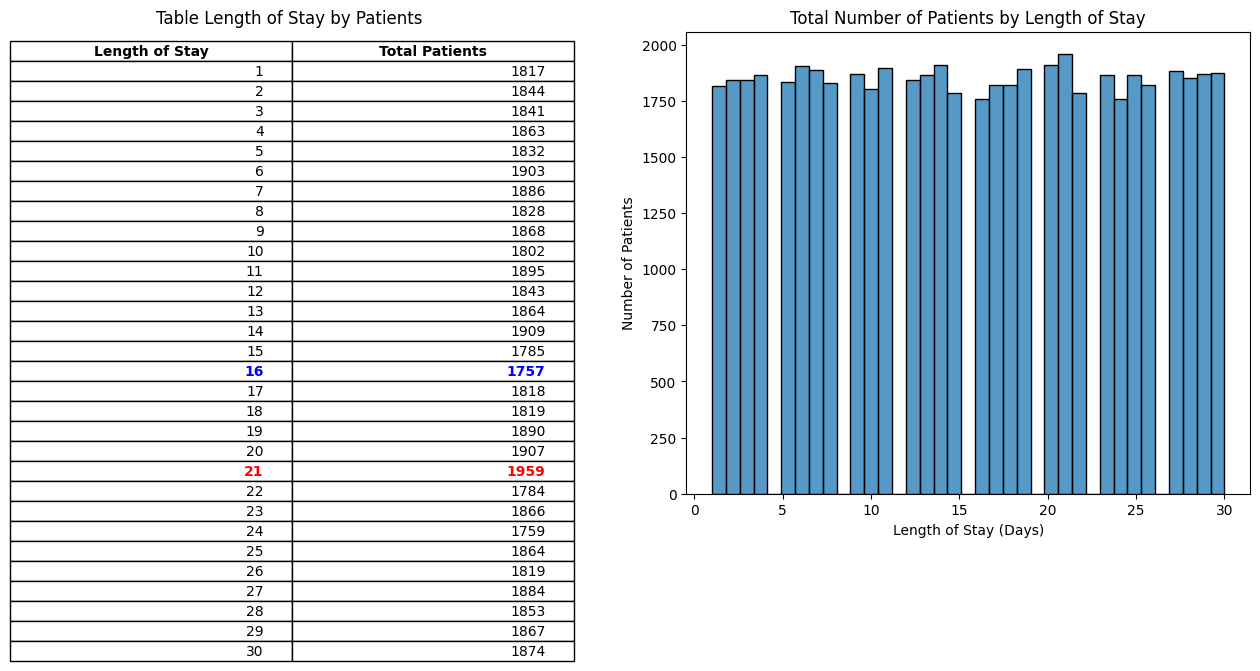

In [141]:
# Table and Chart for Length of Stay

fig, axes = plt.subplots(1,2, figsize=(16,6))

#Table for Length of Stay
freq_table = df['Length of Stay'].value_counts().sort_index().reset_index()
freq_table.columns = ['Length of Stay', 'Total Patients']

#Calculate max and min
max_val = freq_table['Total Patients'].max()
min_val = freq_table['Total Patients'].min()

axes[0].axis('off')  # remove axis
table = axes[0].table(
    cellText=freq_table.values,
    colLabels=freq_table.columns,
    loc='upper center',

)
table.scale(1,1.2)

#change text color
for (row, col), cell in table.get_celld().items():
    if row == 0:
        # header
        cell.set_text_props(weight='bold')
    else:
        value = freq_table.iloc[row-1, 1]  # Total Patients
        if value == max_val:
            cell.set_text_props(color='red', weight='bold')
        elif value == min_val:
            cell.set_text_props(color='blue', weight='bold')
axes[0].set_title("Table Length of Stay by Patients ")


#Graph for Length of Stay
sns.histplot(df['Length of Stay'], ax=axes[1])

axes[1].set_title("Total Number of Patients by Length of Stay")
axes[1].set_xlabel("Length of Stay (Days)")
axes[1].set_ylabel("Number of Patients")

plt.show()

Insights for table and chart Length of Stay

  - The table of length of stay by patients shows that the highest number of patients stayed in the hospital for 21 days (1,959 patients), while the lowest number of patients stayed for 16 days (1,757 patients).

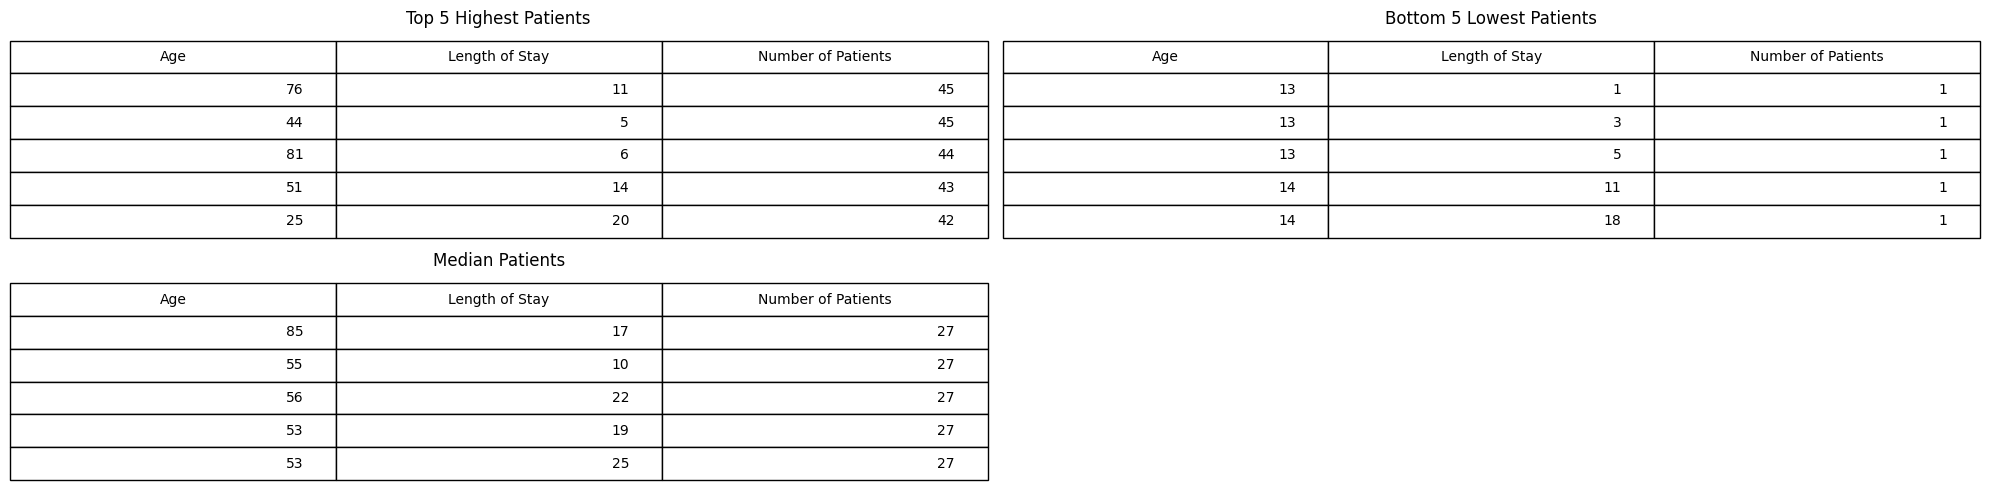

In [142]:
# Table length of stay by age

age_los_counts = df.groupby(['Age','Length of Stay']).size()

table = age_los_counts.reset_index(name='Number of Patients')

# Top 5 highest
top5 = table.sort_values(by="Number of Patients", ascending=False).head(5)

# Bottom 5 lowest
bottom5 = table.sort_values(by="Number of Patients", ascending=True).head(5)

# Median value
median_val = table['Number of Patients'].median()

table['Distance_to_Median'] = abs(table['Number of Patients'] - median_val)

top5_median = table.sort_values('Distance_to_Median').head(5).reset_index(drop=True)

top5_median = top5_median.drop(columns=['Distance_to_Median'])

top5_median['Number of Patients'] = top5_median['Number of Patients'].astype(int)

tables = [
    ("Top 5 Highest Patients", top5),
    ("Bottom 5 Lowest Patients", bottom5),
    ("Median Patients", top5_median)
]

n_cols = 2 #total number of table
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5))

axes = axes.flatten() if n_rows> 1 else axes

bbox = [0, 0, 1, 1]
row_scale = 1.5

for i, (title, df_table) in enumerate(tables):
    axes[i].axis('off')
    tbl = axes[i].table(
        cellText=df_table.values,
        colLabels=df_table.columns,
        loc='center',
        bbox=bbox
    )
    tbl.scale(1, row_scale)
    axes[i].set_title(title, pad=12)

#if there is empty axes
for j in range(len(tables), n_rows*n_cols):
  axes[j].axis('off')

plt.tight_layout()
plt.show()


Insights for table top 5, bottom 5, and median Length of Stay

  - The table shows Top 5 Highest Patients, Bottom 5 Lowest Patients, and the 5 entries closest to the median of the number of patients.
  - In the Top 5 Highest Patients category, Age 76 recorded the highest number of patients (45) with a length of stay of 11 days. This is followed by ages 44, 81, 51, and 25, which show progressively decreasing numbers of patients and varying lengths of stay.
  - In the Bottom 5, ages 13 and 14 are among the lowest number of patients, with 1 patient each, having different lengths of stay.
  - For the Median Number of Patients, the median is 27, represented by various ages and lengths of stay.

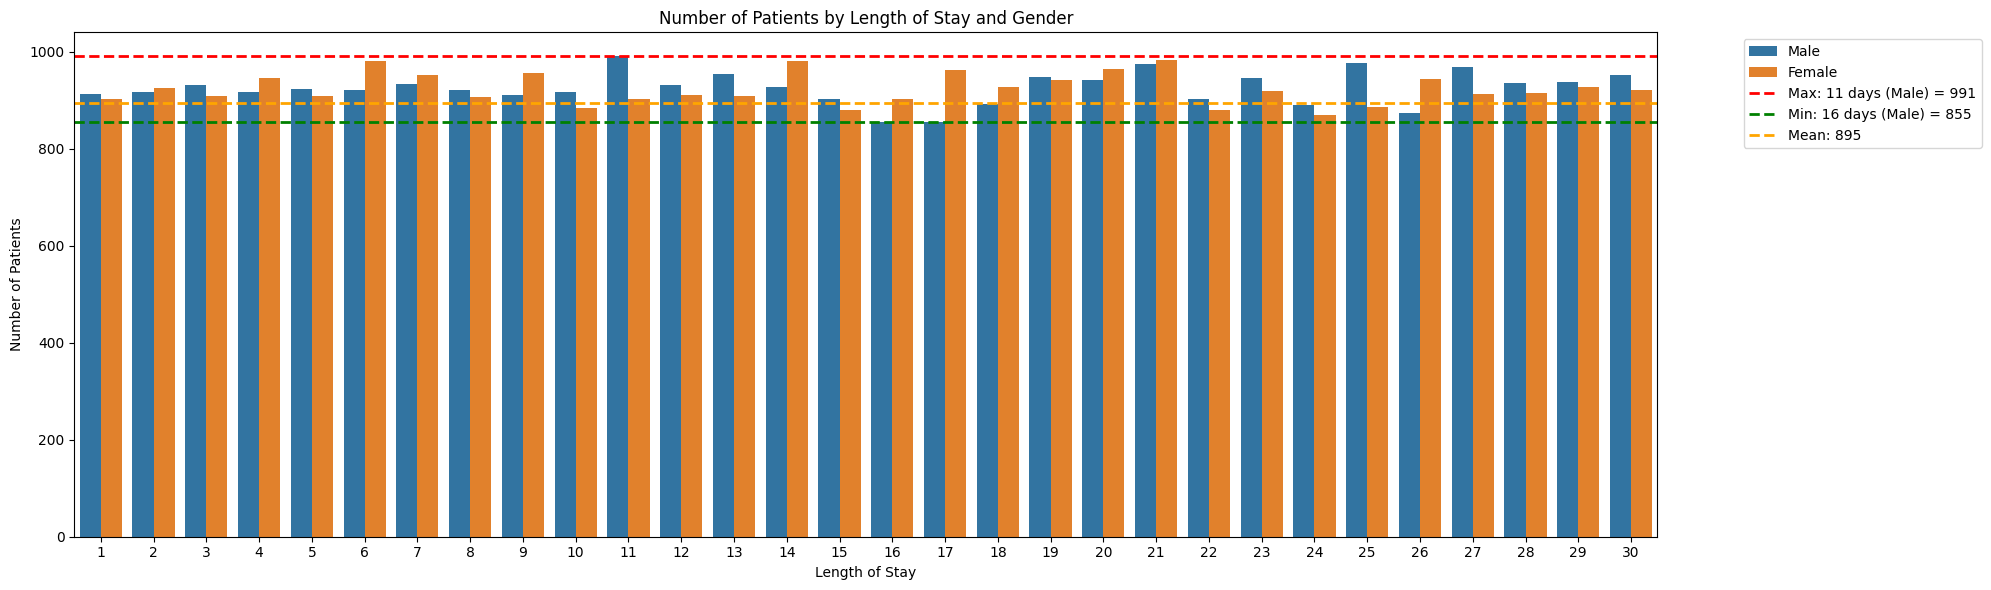

In [143]:
# All combination length of Stay + gender
all_combinations = pd.MultiIndex.from_product(
    [df['Length of Stay'].unique(), df['Gender'].unique()],
    names=['Length of Stay', 'Gender']
)

# Calculate number of patients
counts = (
    df.groupby(['Length of Stay', 'Gender'])
    .size()
    .reindex(all_combinations, fill_value=0)
)

# =========================
# Statistics
# =========================

# Max
max_los, max_gender = counts.idxmax()
max_val = counts.max()

# Min (remove  0 to avoid empty results)
counts_no_zero = counts[counts > 0]
min_los, min_gender = counts_no_zero.idxmin()
min_val = counts_no_zero.min()

# Mean (calculation based on actual data)
mean_val = counts.mean()

# =========================
# PLOT CHART
# =========================

plt.figure(figsize=(20,6))
ax = sns.countplot(
    x='Length of Stay',
    hue='Gender',
    data=df
)

# actual bar height
bar_heights = [p.get_height() for p in ax.patches]
max_bar_height = max(bar_heights)
mean_bar_height = sum(bar_heights) / len(bar_heights)

# =========================
# horizontal line
# =========================

plt.axhline(
    max_bar_height,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Max: {max_los} days ({max_gender}) = {int(max_bar_height)}"
)

plt.axhline(
    min_val,
    color='green',
    linestyle='--',
    linewidth=2,
    label=f"Min: {min_los} days ({min_gender}) = {int(min_val)}"
)

plt.axhline(
    mean_bar_height,
    color='orange',
    linestyle='--',
    linewidth=2,
    label=f"Mean: {int(mean_bar_height)}"
)

# =========================
# TITLE, LABEL, LEGEND
# =========================

plt.title("Number of Patients by Length of Stay and Gender")
plt.xlabel("Length of Stay")
plt.ylabel("Number of Patients")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Insights for chart Number of Patients by Length of Stay and Gender

  - The chart indicates that male patients record the highest number of patients, with 991 patients staying for 11 days. The lowest count is 855 patients at a length of stay of 16 days, also dominated by males. Overall, the mean patient count across hospital stays from 1 to 30 days is 895 patients.

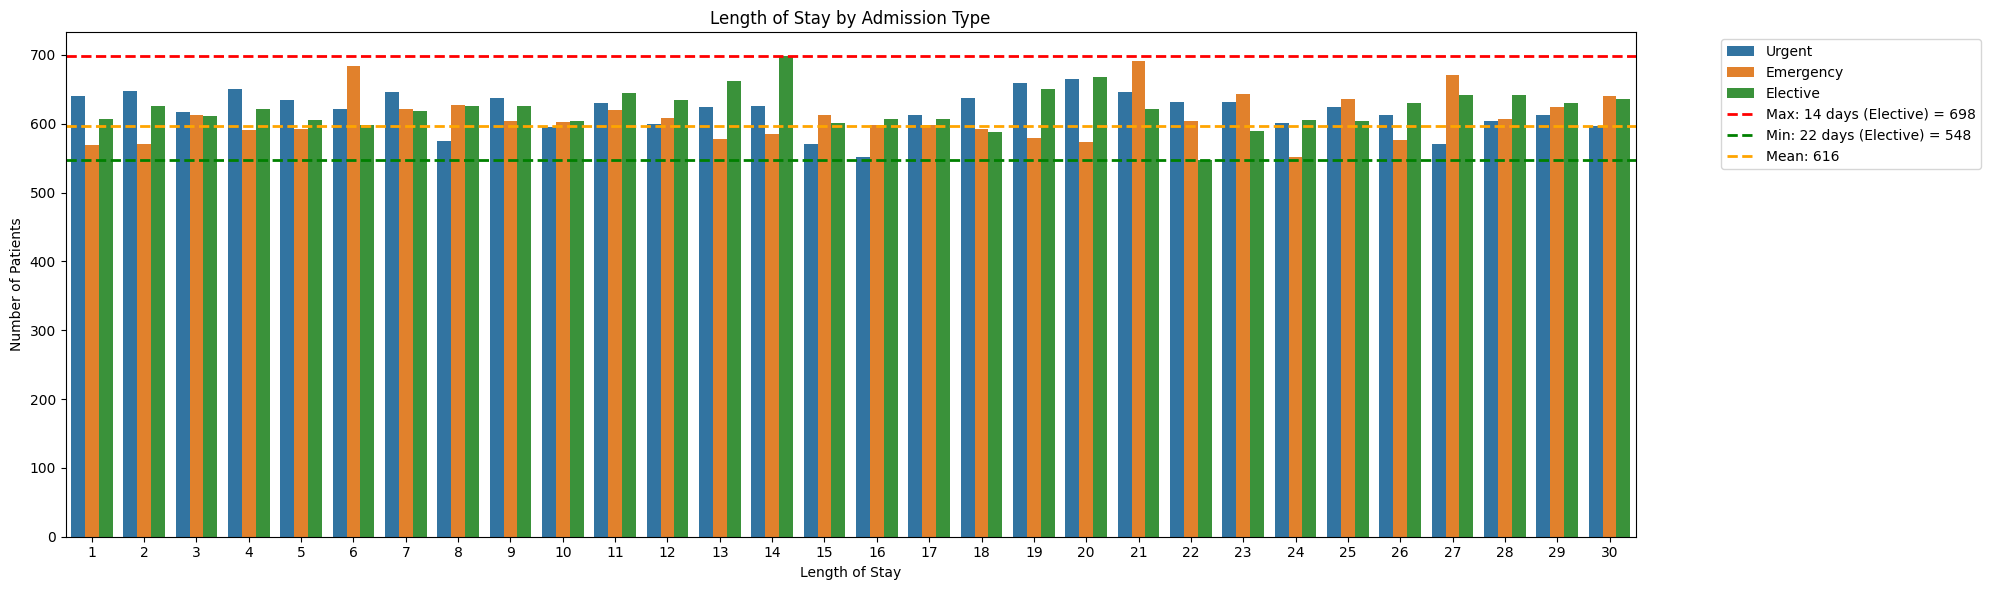

In [144]:
# Chart Length of Stay by Admission Type
all_combinations = pd.MultiIndex.from_product(
    [df['Length of Stay'].unique(), df['Admission Type'].unique()],
    names=['Length of Stay', 'Admission Type']
)

# count max,min,mean
stay_admission_counts = (
    df.groupby(['Length of Stay', 'Admission Type'])
      .size()
      .reindex(all_combinations, fill_value=0)
)
max_los, max_admission_type = stay_admission_counts.idxmax()
max_val = stay_admission_counts.max()

min_los, min_admission_type = stay_admission_counts.idxmin()
min_val = stay_admission_counts.min()

mean_val = stay_admission_counts.mean()

# plot chart
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='Length of Stay',hue='Admission Type',data=df)

# bar heights
bar_heights = [p.get_height() for p in ax.patches]
max_bar_height = max(bar_heights)
min_bar_height = min(bar_heights)
mean_bar_height = sum(bar_heights) / len(bar_heights)

bar_heights = [p.get_height()for p in ax.patches]
mean_bar_height = sum(bar_heights) / len(bar_heights)

# horizontal lines
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_los} days ({max_admission_type}) = {int(max_val)}")

plt.axhline(min_val, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_los} days ({min_admission_type}) = {int(min_val)}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {int(mean_val)}")

# title, labels, legend
plt.title("Length of Stay by Admission Type")
plt.xlabel("Length of Stay")
plt.ylabel("Number of Patients")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Insights for chart Length of Stay by Admission Type

  - As shown in the chart above, the admission type with the highest number of patients is Elective, with 698 patients staying for 14 days. In comparison, the lowest number of patients is 548, who stayed for 22 days, also under the Elective admission type.

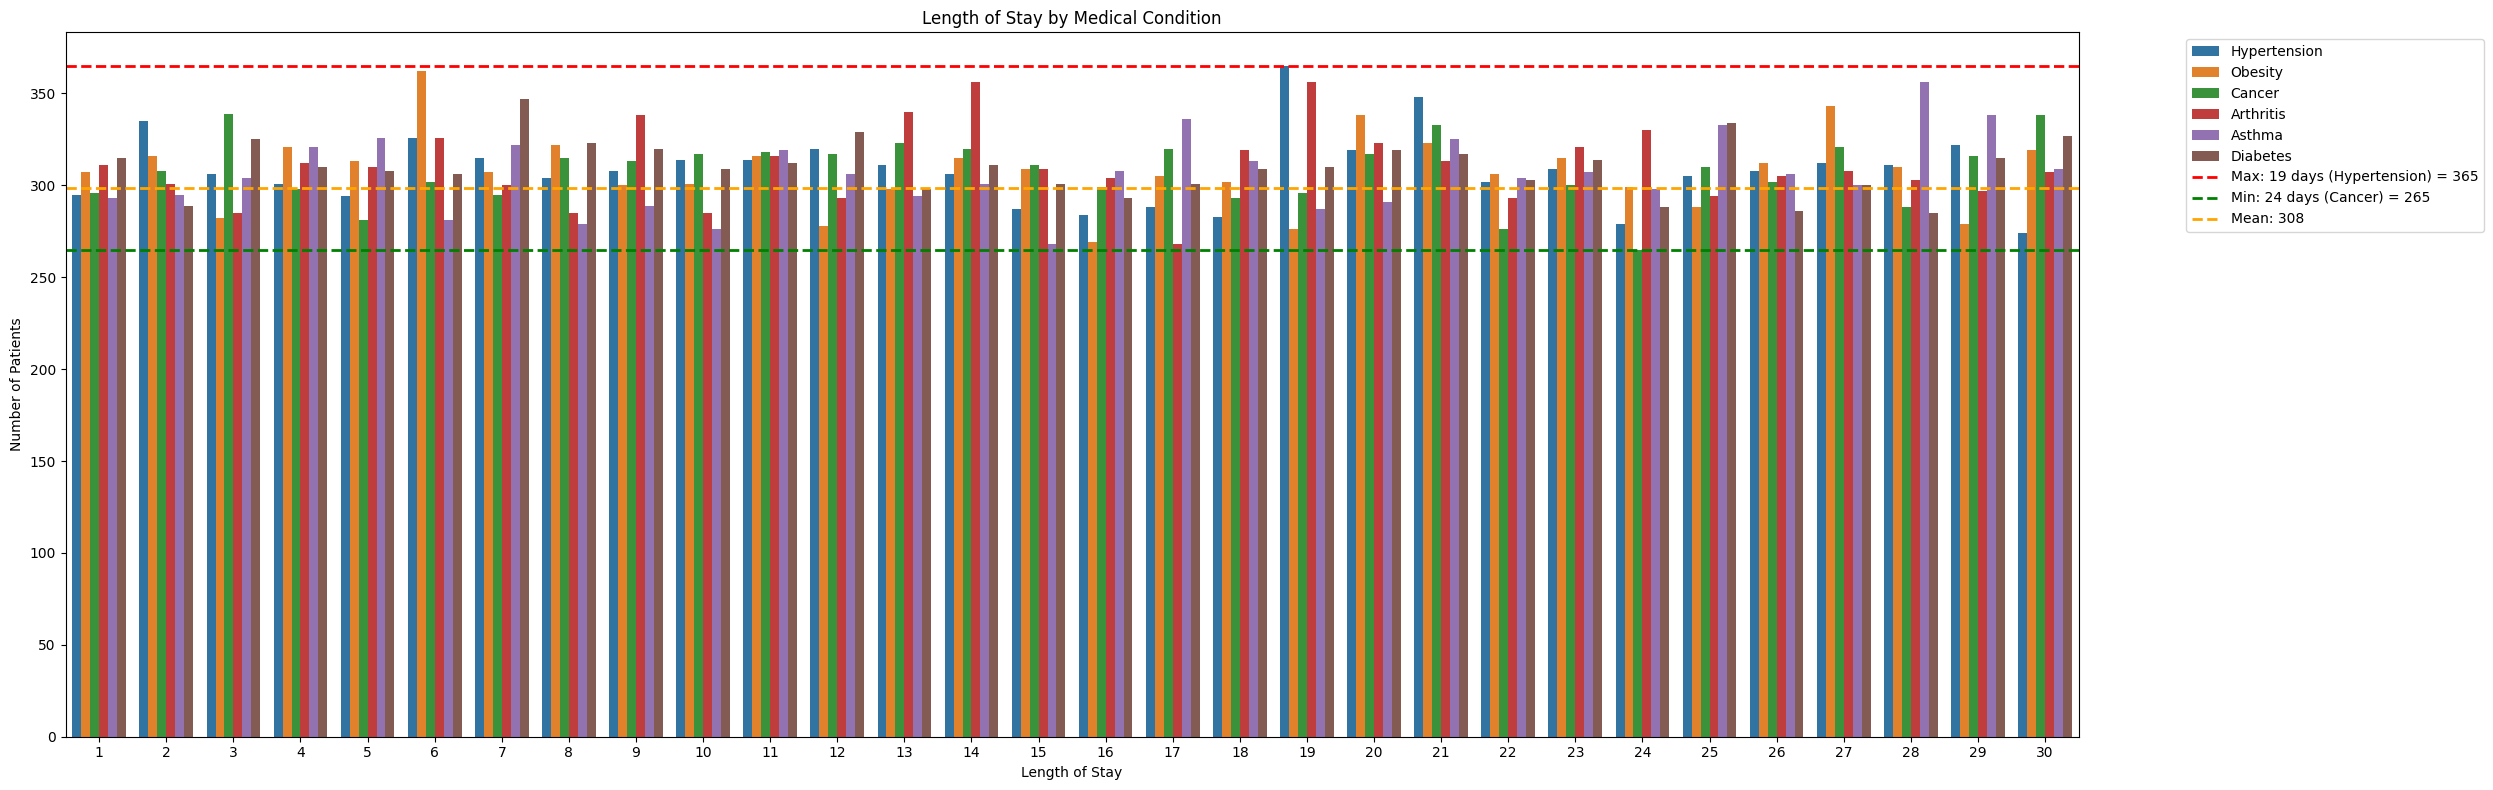

In [145]:
# chart length of stay by medical condition

all_combinations = pd.MultiIndex.from_product(
    [df['Length of Stay'].unique(), df['Medical Condition'].unique()],
    names=['Length of Stay', 'Medical Condition']
)

# count max,min,mean
stay_medicalcondition_counts = (
    df.groupby(['Length of Stay', 'Medical Condition'])
      .size()
      .reindex(all_combinations, fill_value=0)
)
max_los, max_medical_condition = stay_medicalcondition_counts.idxmax()
max_val = stay_medicalcondition_counts.max()

min_los, min_medical_condition = stay_medicalcondition_counts.idxmin()
min_val = stay_medicalcondition_counts.min()

mean_val = stay_medicalcondition_counts.mean()

# plot chart
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='Length of Stay',hue='Medical Condition',data=df)

# bar heights
bar_heights = [p.get_height() for p in ax.patches]
max_bar_height = max(bar_heights)
min_bar_height = min(bar_heights)
mean_bar_height = sum(bar_heights) / len(bar_heights)

bar_heights = [p.get_height()for p in ax.patches]
mean_bar_height = sum(bar_heights) / len(bar_heights)

# horizontal lines
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_los} days ({max_medical_condition}) = {int(max_val)}")

plt.axhline(min_val, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_los} days ({min_medical_condition}) = {int(min_val)}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {int(mean_val)}")

# title, labels, legend
plt.title("Length of Stay by Medical Condition")
plt.xlabel("Length of Stay")
plt.ylabel("Number of Patients")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Insights for Length of Stay by Medical Condition Chart
  - The chart shows that patients with hypertension have the highest number of patients, totaling 365, with a length of stay of 19 days.
  - In contrast, patients with cancer have the lowest number of patients, totaling 265, with a length of stay of 24 days.
  - The mean number of patients staying in the hospital from 1 to 30 days is 308.

In [146]:
# Table Hospital with Billing Amount and Patient number
billing_summary = (
    df.groupby('Hospital')['Billing Amount']
    .agg(['count', 'sum', 'mean', 'min', 'max'])
    .reset_index()
)

billing_summary

,Hospital,count,sum,mean,min,max
0,Abbott Inc,1,38052.041917,38052.041917,38052.041917,38052.041917
1,Abbott Ltd,1,29877.586483,29877.586483,29877.586483,29877.586483
2,"Abbott Moore and Williams,",1,24799.596339,24799.596339,24799.596339,24799.596339
3,"Abbott and Thompson, Sullivan",1,16738.569765,16738.569765,16738.569765,16738.569765
4,"Abbott, Peters and Hoffman",2,37684.793727,18842.396863,18842.396863,18842.396863
...,...,...,...,...,...,...
39871,and Zimmerman Sons,1,32706.652625,32706.652625,32706.652625,32706.652625
39872,"and Zuniga Davis Carlson,",1,42867.041298,42867.041298,42867.041298,42867.041298
39873,"and Zuniga Francis Peterson,",1,33689.630726,33689.630726,33689.630726,33689.630726
39874,and Zuniga Sons,1,33950.170483,33950.170483,33950.170483,33950.170483


In [147]:
# billing_summary = df.groupby('Hospital')['Billing Amount'].agg(['count', 'sum', 'mean', 'min', 'max']).reset_index()

# Find top 1 Hospital in every metric
top_count = billing_summary.loc[billing_summary['count'].idxmax(), ['Hospital', 'count']]
top_sum   = billing_summary.loc[billing_summary['sum'].idxmax(), ['Hospital', 'sum']]
top_mean  = billing_summary.loc[billing_summary['mean'].idxmax(), ['Hospital', 'mean']]
top_min   = billing_summary.loc[billing_summary['min'].idxmax(), ['Hospital', 'min']]
top_max   = billing_summary.loc[billing_summary['max'].idxmax(), ['Hospital', 'max']]

# Combine into 1 dataframe
top_hospitals = pd.DataFrame({
    'Metric': ['Most Patients', 'Total Billing', 'Average Billing', 'Minimum Billing', 'Maximum Billing'],
    'Hospital': [top_count['Hospital'], top_sum['Hospital'], top_mean['Hospital'], top_min['Hospital'], top_max['Hospital']],
    'Value': [top_count['count'], top_sum['sum'], top_mean['mean'], top_min['min'], top_max['max']]
})

top_hospitals.columns = top_hospitals.columns.str.strip()
def format_value(row):
    if row['Metric'] == 'Most Patients':
        return f"{int(row['Value']):,}"      # no decimal
    else:
        return f"{row['Value']:,.2f}"       # 2 decimal
top_hospitals['Value'] = top_hospitals.apply(format_value, axis=1)

top_hospitals

,Metric,Hospital,Value
0,Most Patients,LLC Smith,44
1,Total Billing,Johnson PLC,"1,084,202.69"
2,Average Billing,Hernandez-Morton,"52,373.03"
3,Minimum Billing,Hernandez-Morton,"52,373.03"
4,Maximum Billing,Griffin Group,"52,764.28"


Insights for Billing Summary

  - The table above shows hospital names across several categories: Most Patients, Total Billing, Average Billing, Minimum Billing, and Maximum Billing.

In [148]:
#total billing per age and gender

age_gender_total = df.groupby(['Age', 'Gender'])['Billing Amount'].sum().reset_index()
# Max
max_total = age_gender_total['Billing Amount'].max()
max_row = age_gender_total.loc[age_gender_total['Billing Amount'] == max_total].iloc[0]

# Min
min_total = age_gender_total['Billing Amount'].min()
min_row = age_gender_total.loc[age_gender_total['Billing Amount'] == min_total].iloc[0]

# Mean
mean_total = age_gender_total['Billing Amount'].mean()

print(f"Maximum total billing amount: {max_total:,.2f} (Age {max_row['Age']}, {max_row['Gender']})")
print(f"Minimum total billing amount: {min_total:,.2f} (Age {min_row['Age']}, {min_row['Gender']})")
print(f"Mean total billing amount: {mean_total:,.2f}")

Maximum total billing amount: 12,381,747.57 (Age 38, Female)
Minimum total billing amount: 41,586.45 (Age 89, Male)
Mean total billing amount: 9,204,104.18


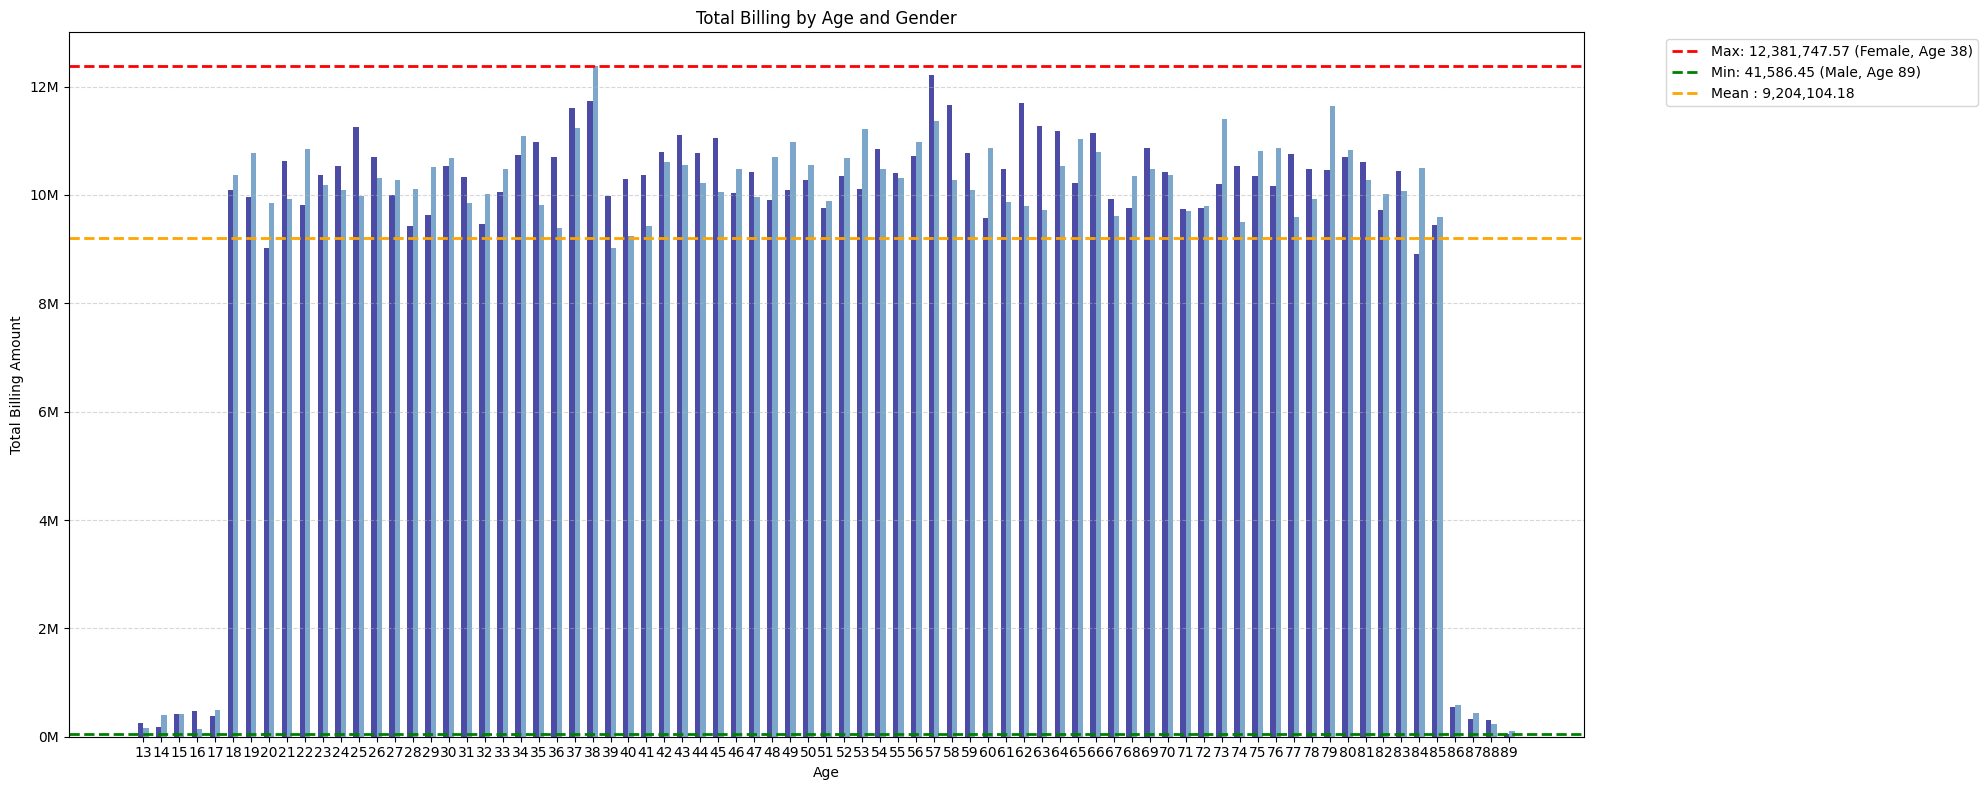

In [149]:
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
ages = sorted(df['Age'].unique())
genders = ['Male','Female']
colors = {'Male':'navy','Female':'steelblue'}
bar_width = 0.6
x = np.arange(len(ages)) * 2

fig, ax = plt.subplots(figsize=(20,8))

# Ambil total billing per age & gender
all_values = []

for gender in genders:
    total_vals = []

    for age in ages:
        subset = age_gender_total[(age_gender_total['Age']==age) & (age_gender_total['Gender']==gender)]
        if not subset.empty:
            total_val = subset['Billing Amount'].values[0]
            total_vals.append(total_val)
            all_values.append(total_val)
        else:
            total_vals.append(0)

    # Adjust position per gender
    x_pos = x - bar_width/2 if gender=='Male' else x + bar_width/2

    ax.bar(x_pos, total_vals, width=bar_width, color=colors[gender], alpha=0.7, label=f'{gender} Total Billing')

# Horizontal lines
global_max_row = age_gender_total.loc[age_gender_total['Billing Amount'].idxmax()]
global_min_row = age_gender_total.loc[age_gender_total['Billing Amount'].idxmin()]
mean_bar = sum(all_values)/len(all_values)

ax.axhline(global_max_row['Billing Amount'], color='red', linestyle='--', linewidth=2)
ax.axhline(global_min_row['Billing Amount'], color='green', linestyle='--', linewidth=2)
ax.axhline(mean_bar, color='orange', linestyle='--', linewidth=2)

# custom y axis numbering view
def millions(x, pos):
    return f'{x*1e-6:.0f}M'  # 1M = 1,000,000

ax.yaxis.set_major_formatter(FuncFormatter(millions))  # <--- betul
# Custom legend
custom_lines = [
    Line2D([0], [0], color='red', linestyle='--', lw=2),
    Line2D([0], [0], color='green', linestyle='--', lw=2),
    Line2D([0], [0], color='orange', linestyle='--', lw=2)
]

custom_labels = [
    f"Max: {global_max_row['Billing Amount']:,.2f} ({global_max_row['Gender']}, Age {global_max_row['Age']})",
    f"Min: {global_min_row['Billing Amount']:,.2f} ({global_min_row['Gender']}, Age {global_min_row['Age']})",
    f"Mean : {mean_bar:,.2f}"
]

ax.legend(custom_lines, custom_labels, bbox_to_anchor=(1.05,1), loc='upper left')

# Axis
ax.set_xticks(x)
ax.set_xticklabels(ages)
ax.set_xlabel('Age')
ax.set_ylabel('Total Billing Amount')
ax.set_title('Total Billing by Age and Gender')

ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Insights for Total Billing by Age and Gender Chart

  - The chart shows that the highest billing amount collected is 12,381,747.57, corresponding to age 38 and female patients.
  - The lowest billing amount collected is 41,586.45, from 89-year-old 9male patients.
  - The mean billing amount across all patients is 9,204,104.18.


In [150]:
#total billing per length of stay

med_total = df.groupby('Length of Stay')['Billing Amount'].sum().reset_index()
#Max
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Length of Stay'].values[0]

# Min
min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Length of Stay'].values[0]

# Mean (purata total billing)
mean_total = med_total['Billing Amount'].mean()
print(f"Maximum total billing amount: {max_total:,.2f} ({med_max})")
print(f"Minimum total billing amount: {min_total:,.2f} ({med_min})")
print(f"Mean total billing amount: {mean_total:,.2f}")

Maximum total billing amount: 50,180,523.01 (14)
Minimum total billing amount: 45,103,654.97 (18)
Mean total billing amount: 47,247,734.78


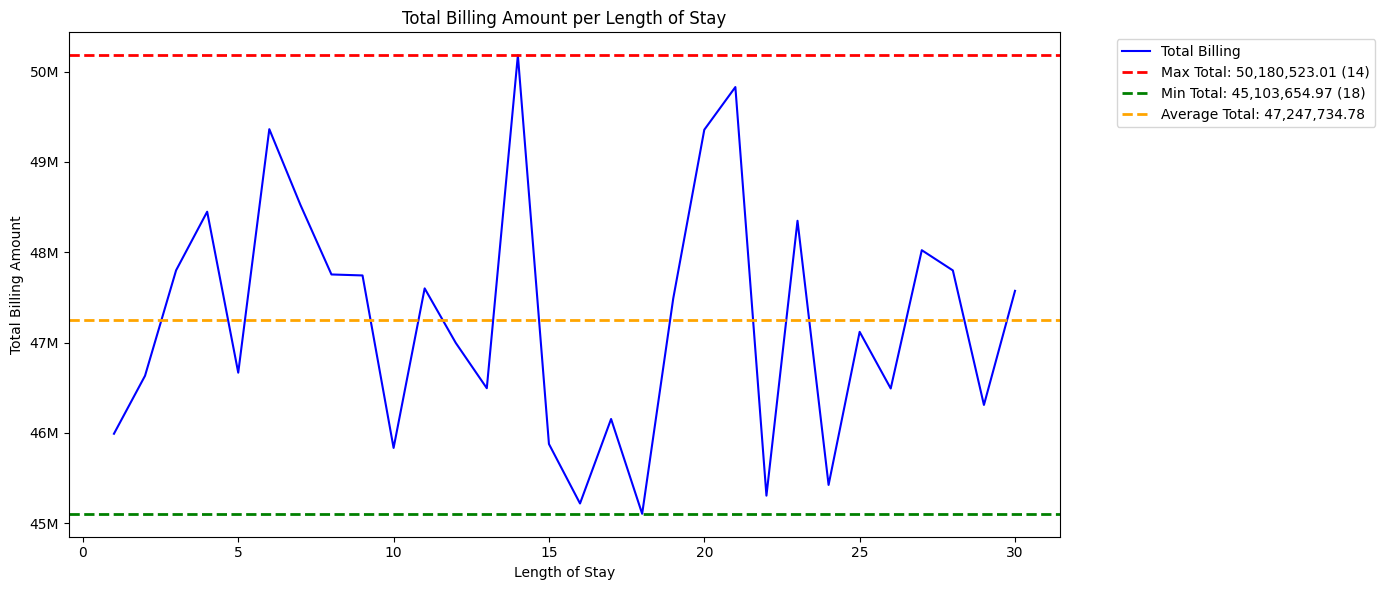

In [151]:
# Chart billing amount by length of stay

from matplotlib.ticker import FuncFormatter

med_total = df.groupby('Length of Stay')['Billing Amount'].sum().reset_index()

#Max, min, mean
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Length of Stay'].values[0]

min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Length of Stay'].values[0]

mean_total = med_total['Billing Amount'].mean()

#plot chart
plt.figure(figsize=(14,6))
plt.plot(med_total['Length of Stay'], med_total['Billing Amount'], color='blue', label='Total Billing')

# horizontal line
plt.axhline(max_total, color='red', linestyle='--', linewidth=2,
            label=f"Max Total: {max_total:,.2f} ({med_max})")
plt.axhline(min_total, color='green', linestyle='--', linewidth=2,
            label=f"Min Total: {min_total:,.2f} ({med_min})")
plt.axhline(mean_total, color='orange', linestyle='--', linewidth=2, label=f'Average Total: {mean_total:,.2f}')

# Custom y-axis format (jutaan M)
def millions(x, pos):
    return f'{x*1e-6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


# Labels & title
plt.xticks(rotation=0)
plt.xlabel("Length of Stay")
plt.ylabel("Total Billing Amount")
plt.title("Total Billing Amount per Length of Stay")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insights for Total Billing Amount per Length of Stay Chart

  - The chart shows that the maximum billing amount collected is 50,180,523.01, which corresponds to a length of stay of 14 days.
  - The minimum billing amount collected is 45,103,654.97, occurring at a length of stay of 18 days.
  - The median billing amount is 47,247,734.78 , representing the typical value across all lengths of stay.

In [152]:
# Total billing per admition type
med_total = df.groupby('Admission Type')['Billing Amount'].sum().reset_index()
#Max
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Admission Type'].values[0]

# Min
min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Admission Type'].values[0]

# Mean (purata total billing)
mean_total = med_total['Billing Amount'].mean()
print(f"Maximum total billing amount: {max_total:,.2f} ({med_max})")
print(f"Minimum total billing amount: {min_total:,.2f} ({med_min})")
print(f"Mean total billing amount: {mean_total:,.2f}")

Maximum total billing amount: 477,609,531.84 (Elective)
Minimum total billing amount: 465,811,948.66 (Emergency)
Mean total billing amount: 472,477,347.80


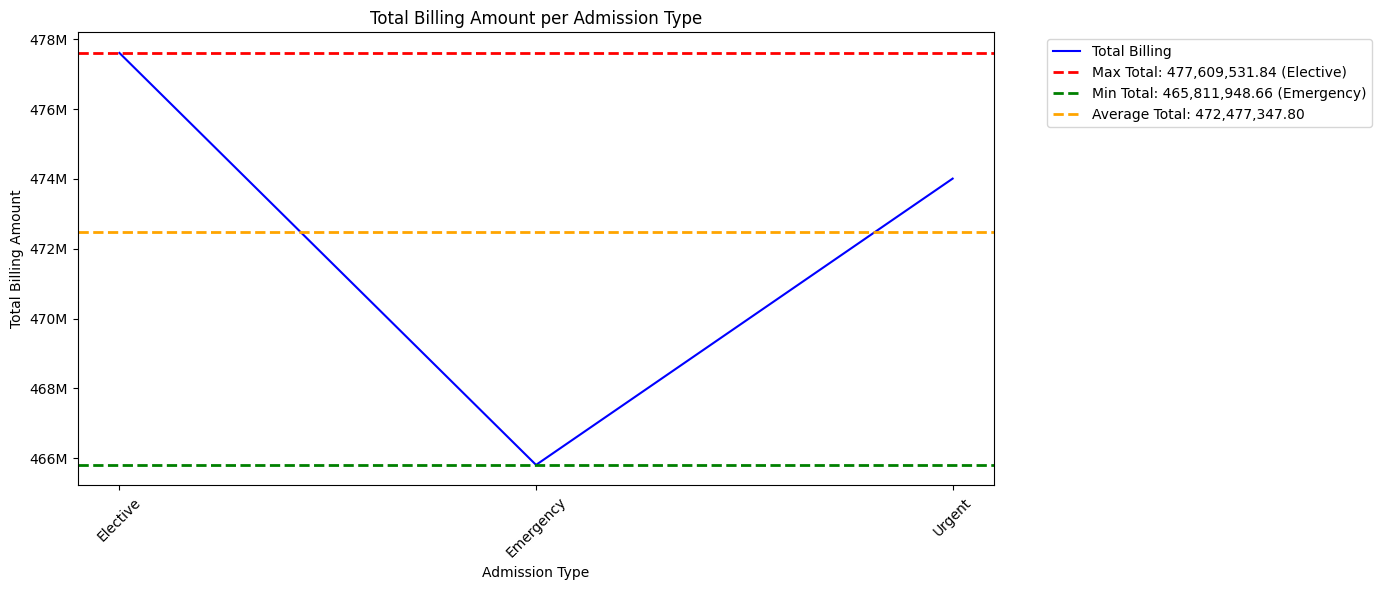

In [153]:
#chart billing amount x admission type

from matplotlib.ticker import FuncFormatter

med_total = df.groupby('Admission Type')['Billing Amount'].sum().reset_index()

#Max, min, mean
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Admission Type'].values[0]

min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Admission Type'].values[0]

mean_total = med_total['Billing Amount'].mean()

#plot chart
plt.figure(figsize=(14,6))
plt.plot(med_total['Admission Type'], med_total['Billing Amount'], color='blue', label='Total Billing')

# horizontal line
plt.axhline(max_total, color='red', linestyle='--', linewidth=2,
            label=f"Max Total: {max_total:,.2f} ({med_max})")
plt.axhline(min_total, color='green', linestyle='--', linewidth=2,
            label=f"Min Total: {min_total:,.2f} ({med_min})")
plt.axhline(mean_total, color='orange', linestyle='--', linewidth=2, label=f'Average Total: {mean_total:,.2f}')

# Custom y-axis format (jutaan M)
def millions(x, pos):
    return f'{x*1e-6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


# Labels & title
plt.xticks(rotation=45)
plt.xlabel("Admission Type")
plt.ylabel("Total Billing Amount")
plt.title("Total Billing Amount per Admission Type")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights for Total Billing Amount per Admission Type Chart

  - The line chart indicates that the Emergency admission type has the lowest average billing amount (465,811,948.66), whereas the Elective admission type records a higher billing amount of 477,609,531.84. The overall mean billing amount across admission types is 472,477,347.80.

In [154]:
# Total billing per medical condition
med_total = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index()
#Max
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Medical Condition'].values[0]

# Min
min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Medical Condition'].values[0]

# Mean (purata total billing)
mean_total = med_total['Billing Amount'].mean()
print(f"Maximum total billing amount: {max_total:,.2f} ({med_max})")
print(f"Minimum total billing amount: {min_total:,.2f} ({med_min})")
print(f"Mean total billing amount: {mean_total:,.2f}")

Maximum total billing amount: 238,539,725.49 (Diabetes)
Minimum total billing amount: 232,167,861.31 (Cancer)
Mean total billing amount: 236,238,673.90


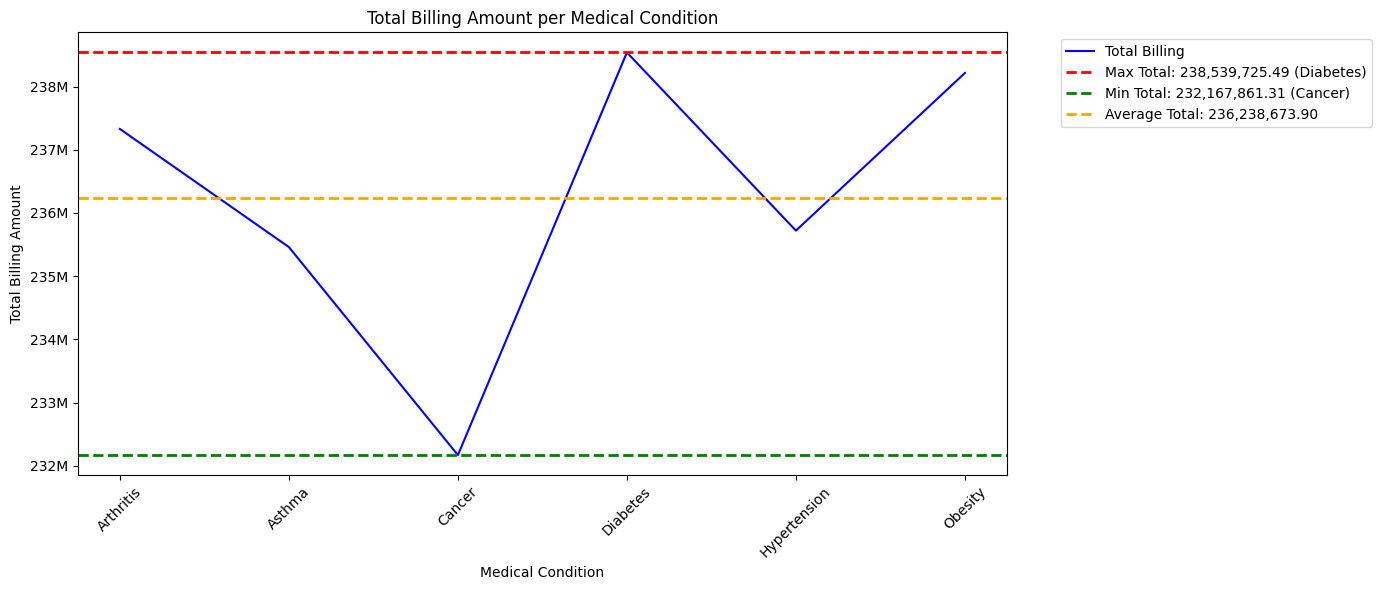

In [155]:
#Chart billing amount x medical condition

from matplotlib.ticker import FuncFormatter

med_total = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index()

#Max, min, mean
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Medical Condition'].values[0]

min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Medical Condition'].values[0]

mean_total = med_total['Billing Amount'].mean()

#plot chart
plt.figure(figsize=(14,6))
plt.plot(med_total['Medical Condition'], med_total['Billing Amount'], color='blue', label='Total Billing')

# horizontal line
plt.axhline(max_total, color='red', linestyle='--', linewidth=2,
            label=f"Max Total: {max_total:,.2f} ({med_max})")
plt.axhline(min_total, color='green', linestyle='--', linewidth=2,
            label=f"Min Total: {min_total:,.2f} ({med_min})")
plt.axhline(mean_total, color='orange', linestyle='--', linewidth=2, label=f'Average Total: {mean_total:,.2f}')

# Custom y-axis format (jutaan M)
def millions(x, pos):
    return f'{x*1e-6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


# Labels & title
plt.xticks(rotation=45)
plt.xlabel("Medical Condition")
plt.ylabel("Total Billing Amount")
plt.title("Total Billing Amount per Medical Condition")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights for Total Billing Amount per Medical Condition Chart
  - The chart indicates that Obesity generates the highest billing amount (238,539,725.49) among all medical conditions. While, Cancer recording the lowest billing amount at 232,167,861.31. The overall mean billing amount across medical conditions is 236,238,673.90.

In [156]:
# Total billing per medication
med_total = df.groupby('Medication')['Billing Amount'].sum().reset_index()
#Max
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Medication'].values[0]

# Min
min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Medication'].values[0]

# Mean (purata total billing)
mean_total = med_total['Billing Amount'].mean()
print(f"Maximum total billing amount: {max_total:,.2f} ({med_max})")
print(f"Minimum total billing amount: {min_total:,.2f} ({med_min})")
print(f"Mean total billing amount: {mean_total:,.2f}")

Maximum total billing amount: 286,359,751.17 (Ibuprofen)
Minimum total billing amount: 282,133,474.09 (Penicillin)
Mean total billing amount: 283,486,408.68


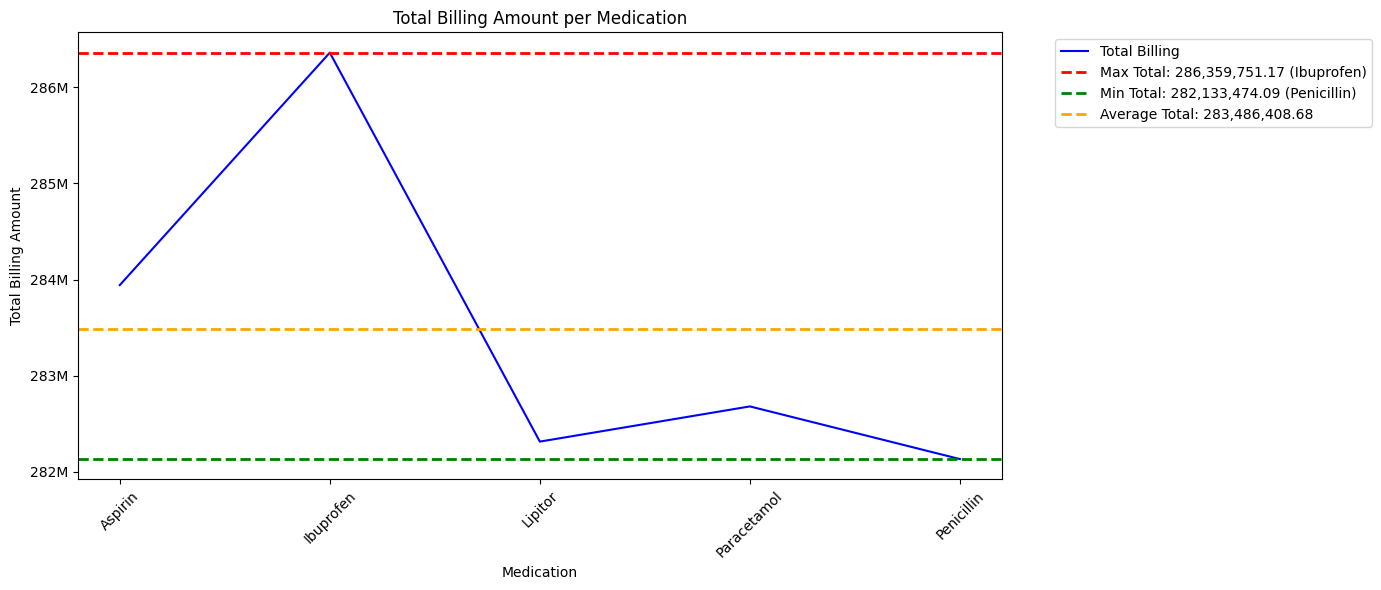

In [157]:
# Chart billing amount x medication

from matplotlib.ticker import FuncFormatter

med_total = df.groupby('Medication')['Billing Amount'].sum().reset_index()

#Max, min, mean
max_total = med_total['Billing Amount'].max()
med_max = med_total.loc[med_total['Billing Amount'] == max_total, 'Medication'].values[0]

min_total = med_total['Billing Amount'].min()
med_min = med_total.loc[med_total['Billing Amount'] == min_total, 'Medication'].values[0]

mean_total = med_total['Billing Amount'].mean()

#plot chart
plt.figure(figsize=(14,6))
plt.plot(med_total['Medication'], med_total['Billing Amount'], color='blue', label='Total Billing')

# horizontal line
plt.axhline(max_total, color='red', linestyle='--', linewidth=2,
            label=f"Max Total: {max_total:,.2f} ({med_max})")
plt.axhline(min_total, color='green', linestyle='--', linewidth=2,
            label=f"Min Total: {min_total:,.2f} ({med_min})")
plt.axhline(mean_total, color='orange', linestyle='--', linewidth=2, label=f'Average Total: {mean_total:,.2f}')

# Custom y-axis format (jutaan M)
def millions(x, pos):
    return f'{x*1e-6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))


# Labels & title
plt.xticks(rotation=45)
plt.xlabel("Medication")
plt.ylabel("Total Billing Amount")
plt.title("Total Billing Amount per Medication")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insights for Total Billing Amount per Medication Chart

  - The chart indicates that Ibuprofen generates the highest billing amount (286,359,751.17) among the medications analyzed, whereas Penicilin records the lowest amount collected (282,133,474.09). The overall mean billing amount for all medications is 283,486,408.68.

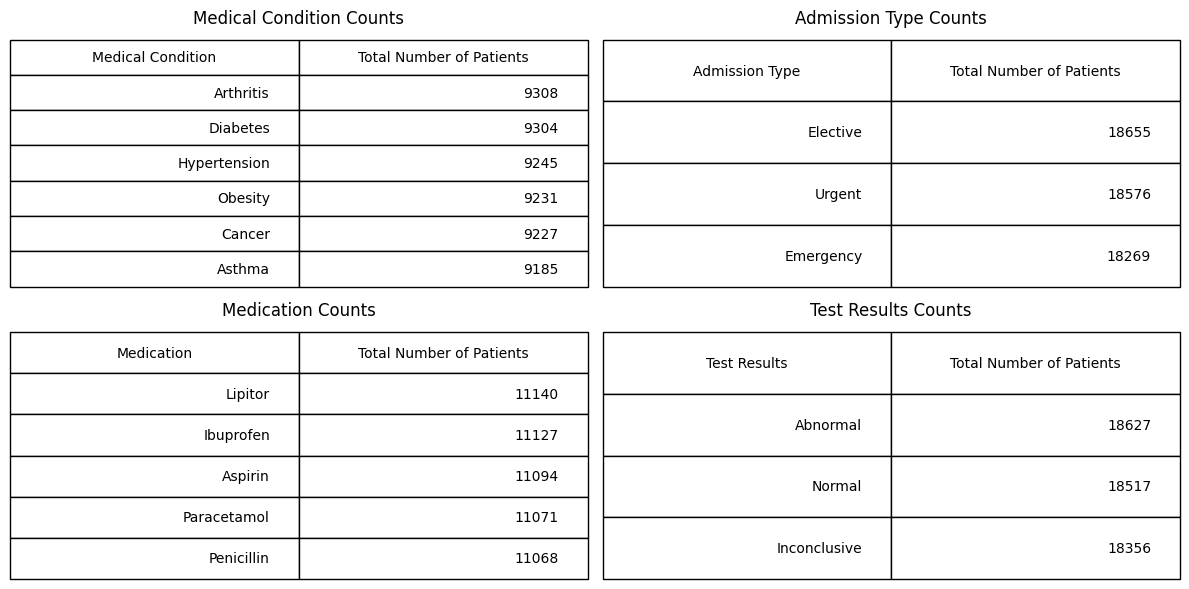

In [158]:
# Table of patients counts for, medical condition, admission type, medication, and test results
MedicalCondition_counts = df['Medical Condition'].value_counts().reset_index()
MedicalCondition_counts.columns = ['Medical Condition','Total Number of Patients']

admission_counts = df['Admission Type'].value_counts().reset_index()
admission_counts.columns = ["Admission Type",'Total Number of Patients']

medication_counts = df['Medication'].value_counts().reset_index()
medication_counts.columns = ['Medication', 'Total Number of Patients']

testResults_counts = df['Test Results'].value_counts().reset_index()
testResults_counts.columns = ['Test Results','Total Number of Patients']




#Combine Side By Side Table
tables = [
    ("Medical Condition Counts", MedicalCondition_counts),
    ("Admission Type Counts", admission_counts),
    ("Medication Counts", medication_counts),
    ("Test Results Counts", testResults_counts)

]

n_cols = 2
n_rows = (len(tables) + 1) // n_cols  # auto calculate row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

# Flatten axes if have 1 rows
axes = axes.flatten() if n_rows > 1 else axes

# Similar table size
bbox = [0, 0, 1, 1]  # left, bottom, width, height
row_scale = 1.5

for i, (title, df_table) in enumerate(tables):
    axes[i].axis('off')  # remove axis
    tbl = axes[i].table(
        cellText=df_table.values,
        colLabels=df_table.columns,
        loc='center',
        bbox=bbox  # all table use same bbox
    )
    tbl.scale(1, row_scale)   # same row height
    axes[i].set_title(title, pad=12)

#if there is empty axes (if tables < n_cols*n_rows)
for j in range(len(tables), n_rows * n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Insights for total number of patients based on categories

  - The tables summarize patient numbers by category: Medical Condition, Admission Type, Medication, and Test Results.

In [159]:
# Count number of patients by Age and Medical Condition
medical_age = (
    df.groupby(['Age', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# TOP 5 (paling ramai pesakit)
top5 = medical_age.sort_values(by='Patient_Count', ascending=False).head(5)

# BOTTOM 5 (paling sikit pesakit)
bottom5 = medical_age.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean
mean_total = medical_age['Patient_Count'].mean()

print("Top 5 Highest Number of Patients:")
print(top5)

print("\nBottom 5 Lowest Number of Patients:")
print(bottom5)

print(f"\nMean number of patients: {mean_total:.2f}")


Top 5 Highest Number of Patients:
     Age Medical Condition  Patient_Count
72    25            Asthma            168
152   38          Diabetes            168
218   49          Diabetes            167
147   37      Hypertension            165
234   52            Asthma            165

Bottom 5 Lowest Number of Patients:
     Age Medical Condition  Patient_Count
3     13      Hypertension              1
9     14      Hypertension              1
457   89            Cancer              1
456   89            Asthma              1
460   89           Obesity              1

Mean number of patients: 120.39


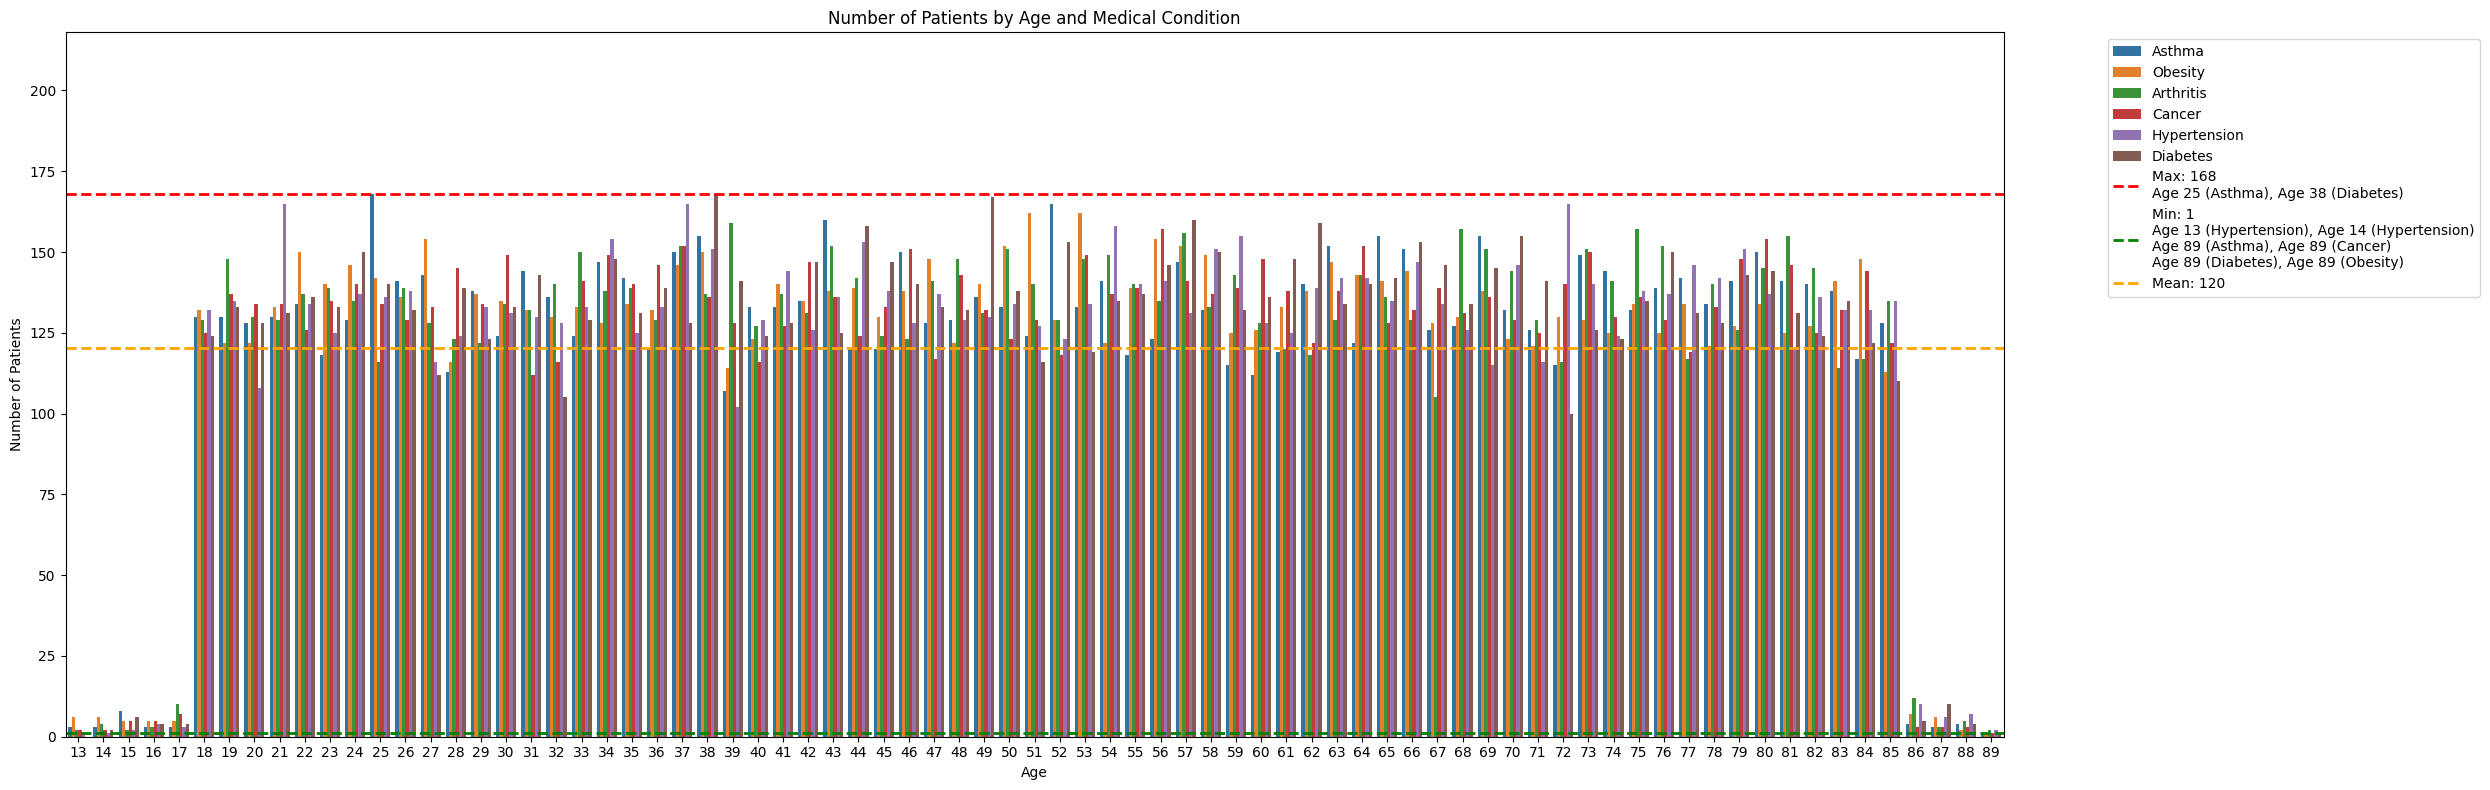

In [160]:
# Count patients by Age + Medical Condition
medical_age = (
    df.groupby(['Age', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# Max & Min (semua tied)
max_total = medical_age['Patient_Count'].max()
min_total = medical_age['Patient_Count'].min()

max_rows = medical_age[medical_age['Patient_Count'] == max_total]
min_rows = medical_age[medical_age['Patient_Count'] == min_total]

# Mean dari DataFrame
mean_total = medical_age['Patient_Count'].mean()

# Function untuk wrap legend text selepas n items
def wrap_text(rows, n_items=2):
    text_lines = []
    for i in range(0, len(rows), n_items):
        chunk = rows.iloc[i:i+n_items]
        line = ", ".join([f"Age {row.Age} ({row['Medical Condition']})" for _, row in chunk.iterrows()])
        text_lines.append(line)
    return "\n".join(text_lines)

# Wrap legend text
max_text_wrapped = wrap_text(max_rows, n_items=2)
min_text_wrapped = wrap_text(min_rows, n_items=2)

# Plot chart
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='Age', hue='Medical Condition', data=df)

# Horizontal lines – gunakan nilai dari DataFrame
max_bar_height = max_total
min_bar_height = min_total
mean_bar_height = mean_total

# Tambah padding atas supaya max line nampak jelas
plt.ylim(0, max_bar_height + 50)  # adjust padding ikut dataset

# Horizontal lines
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_total}\n{max_text_wrapped}")

plt.axhline(min_bar_height, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_total}\n{min_text_wrapped}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {mean_bar_height:.0f}")

# Title & labels
plt.title("Number of Patients by Age and Medical Condition")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

Insigths for Number of Patients by Age and Medical Condition Chart
  - The chart showing the number of patients by age and medical condition indicates that Asthma and Diabetes had the highest number of patients, with 168 patients each, occurring at age 25 (Asthma) and age 38 (Diabetes).
  - In contrast, Hypertension, Asthma, Cancer, Diabetes, and Obesity had the lowest number of patients, with only 1 patient each. This occurred at ages 13 and 14 for Hypertension, and age 89 for Asthma, Cancer, Diabetes, and Obesity.
  
  - The mean number of patients across all age and medical condition combinations is approximately 120 patients.

In [161]:
#number of patients by medical condition and gender

medical_Gender = (
    df.groupby(['Gender', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# TOP 5 (paling ramai pesakit)
top5 = medical_Gender.sort_values(by='Patient_Count', ascending=False).head(5)

# BOTTOM 5 (paling sikit pesakit)
bottom5 = medical_Gender.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean
mean_total = medical_Gender['Patient_Count'].mean()

print("Top 5 Highest Number of Patients:")
print(top5)

print("\nBottom 5 Lowest Number of Patients:")
print(bottom5)

print(f"\nMean number of patients: {mean_total:.0f}")


Top 5 Highest Number of Patients:
    Gender Medical Condition  Patient_Count
0   Female         Arthritis           4686
9     Male          Diabetes           4653
3   Female          Diabetes           4651
10    Male      Hypertension           4633
7     Male            Asthma           4632

Bottom 5 Lowest Number of Patients:
    Gender Medical Condition  Patient_Count
1   Female            Asthma           4553
2   Female            Cancer           4602
11    Male           Obesity           4609
4   Female      Hypertension           4612
6     Male         Arthritis           4622

Mean number of patients: 4625


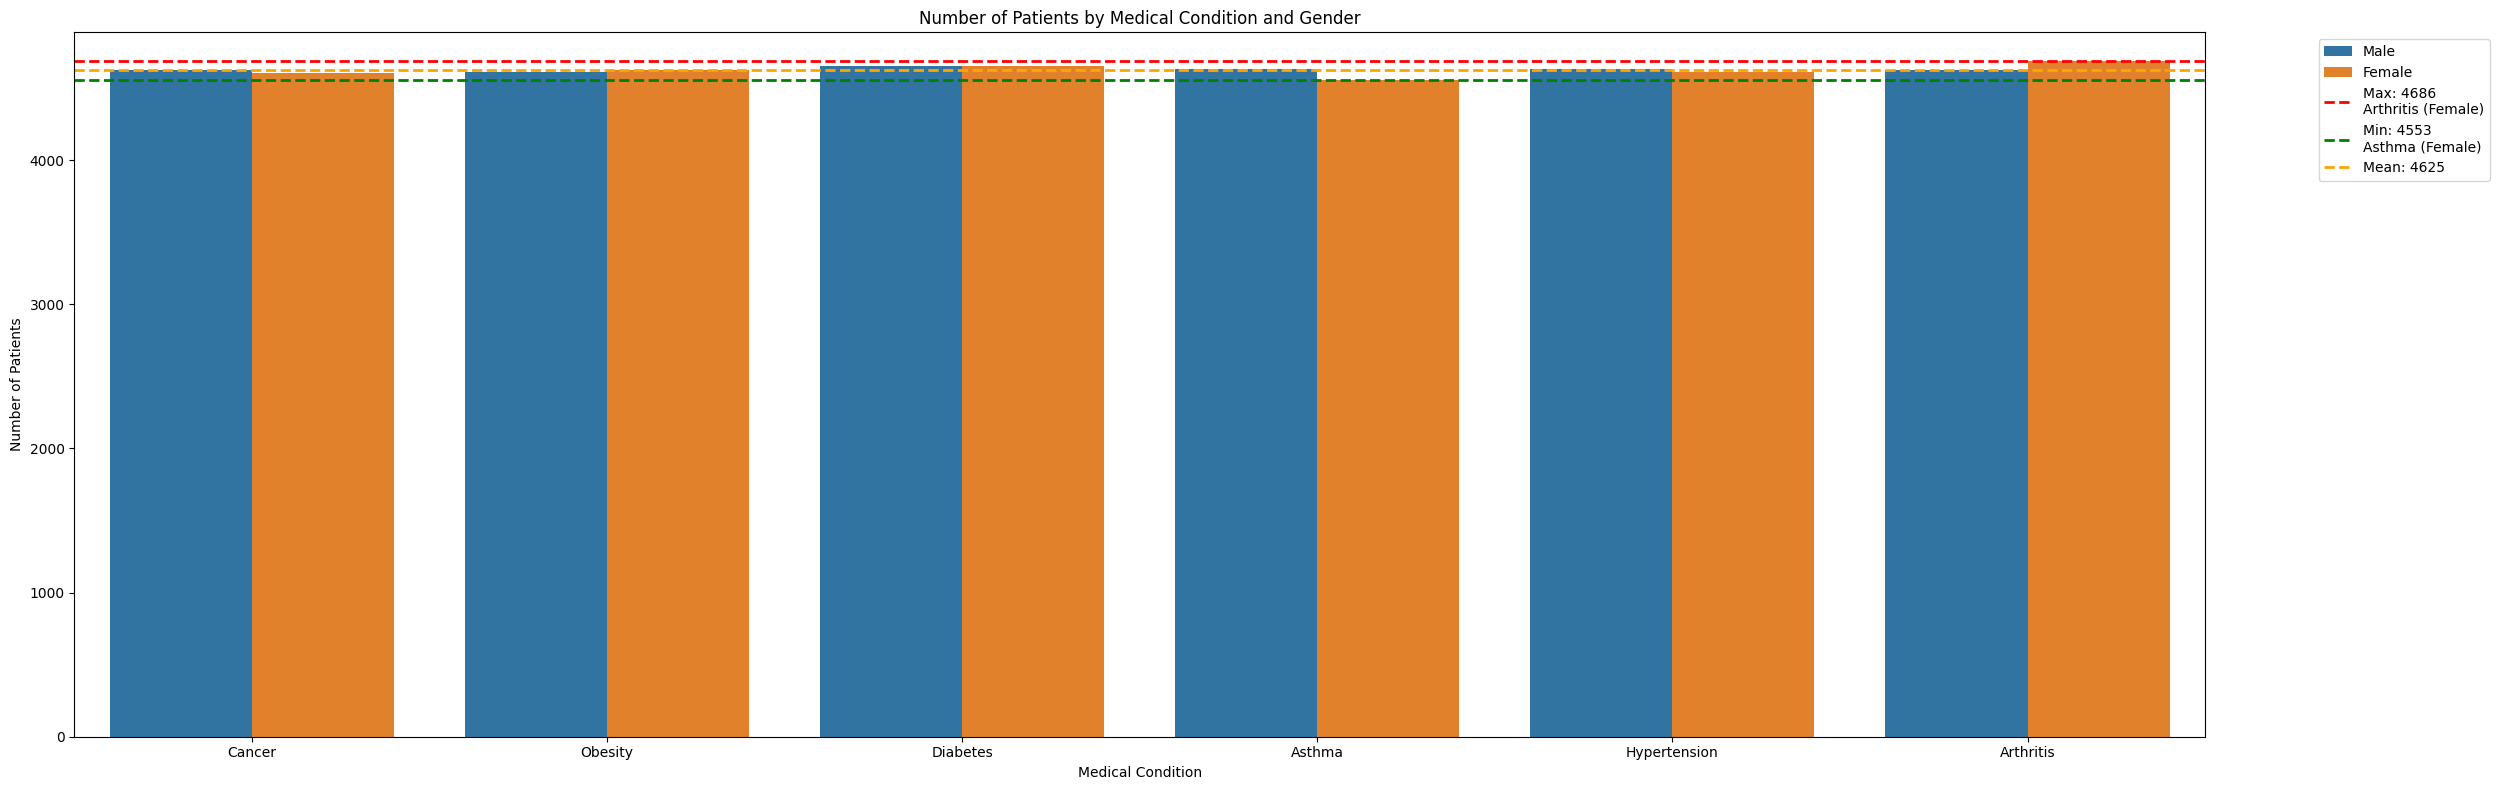

In [162]:
# Count patients by Medical Condition + Gender
gender_Medical = (
    df.groupby(['Medical Condition', 'Gender'])
      .size()
      .reset_index(name='Patient_Count')
)

# Max & Min (semua tied)
max_total = gender_Medical['Patient_Count'].max()
min_total = gender_Medical['Patient_Count'].min()

max_rows = gender_Medical[gender_Medical['Patient_Count'] == max_total]
min_rows = gender_Medical[gender_Medical['Patient_Count'] == min_total]

# Mean dari DataFrame
mean_total = gender_Medical['Patient_Count'].mean()

# Function untuk wrap legend text selepas n items
def wrap_text(rows, n_items=2):
    text_lines = []
    for i in range(0, len(rows), n_items):
        chunk = rows.iloc[i:i+n_items]
        line = ", ".join([f"{row['Medical Condition']} ({row['Gender']})" for _, row in chunk.iterrows()])
        text_lines.append(line)
    return "\n".join(text_lines)

# Wrap legend text
max_text_wrapped = wrap_text(max_rows, n_items=2)
min_text_wrapped = wrap_text(min_rows, n_items=2)

# Plot chart
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='Medical Condition', hue='Gender', data=df)

# Gunakan nilai dari DataFrame untuk horizontal line
max_bar_height = max_total
min_bar_height = min_total
mean_bar_height = mean_total

# Tambah padding atas supaya max line nampak
plt.ylim(0, max_bar_height + 200)

# Horizontal lines
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_total}\n{max_text_wrapped}")

plt.axhline(min_bar_height, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_total}\n{min_text_wrapped}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {mean_bar_height:.0f}")

# Title & labels
plt.title("Number of Patients by Medical Condition and Gender")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

Insights for Number of Patients by Medical Condition and Gender Chart
  - The chart indicates that female patients represent the highest patient count, with 4,686 individuals diagnosed with Arthritis.
  - Conversely, the lowest patient count is also among females, with 4,553 individuals diagnosed with Asthma.
  - The overall mean patient count across all medical conditions and genders is approximately 4,625.

In [163]:
#number of patients by medical condition and test result


medical_test = (
    df.groupby(['Test Results', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# TOP 5 highest patient counts
top5 = medical_test.sort_values(by='Patient_Count', ascending=False).head(5)

# BOTTOM 5 lowest patient counts
bottom5 = medical_test.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean
mean_total = medical_test['Patient_Count'].mean()

# Display results
print("Top 5 Test Result & Medical Condition combinations with highest patient counts:")
print(top5.to_string(index=False))

print("\nBottom 5 Test Result & Medical Condition combinations with lowest patient counts:")
print(bottom5.to_string(index=False))

print(f"\nOverall mean patient count across all Test Result and Medical Condition combinations: {mean_total:.0f}")


Top 5 Test Result & Medical Condition combinations with highest patient counts:
Test Results Medical Condition  Patient_Count
    Abnormal         Arthritis           3188
    Abnormal          Diabetes           3168
      Normal            Asthma           3147
      Normal      Hypertension           3142
    Abnormal           Obesity           3132

Bottom 5 Test Result & Medical Condition combinations with lowest patient counts:
Test Results Medical Condition  Patient_Count
    Abnormal            Asthma           3009
    Abnormal      Hypertension           3012
Inconclusive            Asthma           3029
      Normal         Arthritis           3032
Inconclusive           Obesity           3042

Overall mean patient count across all Test Result and Medical Condition combinations: 3083


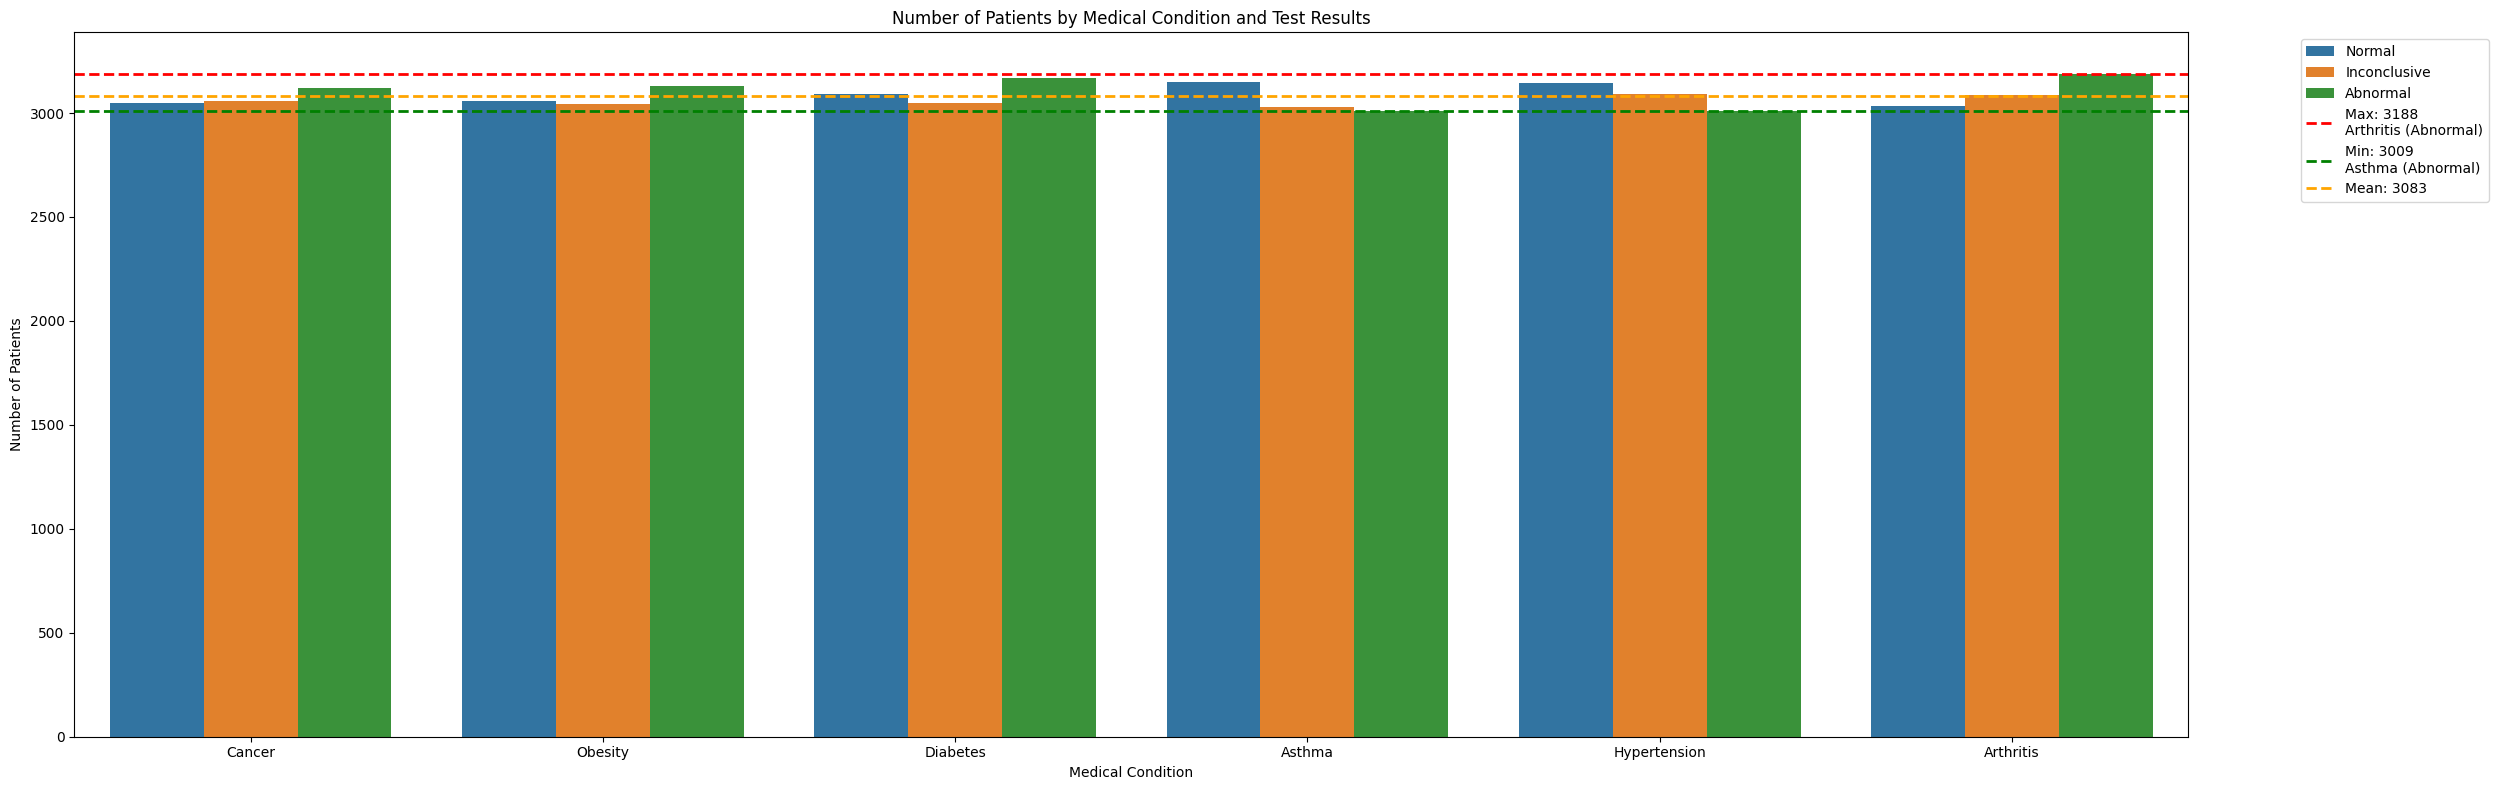

In [164]:
# Count patients by Test Result + Medical Condition
medical_test = (
    df.groupby(['Test Results', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# Top 5 / Bottom 5
top5 = medical_test.sort_values(by='Patient_Count', ascending=False).head(5)
bottom5 = medical_test.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean – ambil terus dari DataFrame
mean_total = medical_test['Patient_Count'].mean()

# Max & Min (semua tied)
max_total = medical_test['Patient_Count'].max()
min_total = medical_test['Patient_Count'].min()

max_rows = medical_test[medical_test['Patient_Count'] == max_total]
min_rows = medical_test[medical_test['Patient_Count'] == min_total]

# Function untuk wrap legend text selepas n items
def wrap_text(rows, n_items=2):
    text_lines = []
    for i in range(0, len(rows), n_items):
        chunk = rows.iloc[i:i+n_items]
        line = ", ".join([f"{row['Medical Condition']} ({row['Test Results']})" for _, row in chunk.iterrows()])
        text_lines.append(line)
    return "\n".join(text_lines)

# Wrap legend text
max_text_wrapped = wrap_text(max_rows, n_items=2)
min_text_wrapped = wrap_text(min_rows, n_items=2)

# Plot chart
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='Medical Condition', hue='Test Results', data=df)

# Gunakan nilai sebenar dari DataFrame untuk max/min/mean
max_bar_height = max_total
min_bar_height = min_total
mean_bar_height = mean_total

# Tambah padding atas supaya semua horizontal line nampak
plt.ylim(0, max_bar_height + 200)

# Horizontal lines
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_total}\n{max_text_wrapped}")

plt.axhline(min_bar_height, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_total}\n{min_text_wrapped}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {mean_bar_height:.0f}")

# Title & labels
plt.title("Number of Patients by Medical Condition and Test Results")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()



Insights for Number of Patients by Medical Condition and Test Results Chart

  - The chart indicates that the maximum number of patients is associated with Arthritis (3,188 patients), all of whom had abnormal test results.
  - Conversely, the lowest number of patients is associated with Asthma (3,009 patients), also with abnormal test results.
  - The mean number of patients across all test results and medical conditions is approximately 3,083 patients.

In [165]:
#number of patients by medical condition and medication

medical_Medication = (
    df.groupby(['Medication', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# TOP 5 (paling ramai pesakit)
top5 = medical_Medication.sort_values(by='Patient_Count', ascending=False).head(5)

# BOTTOM 5 (paling sikit pesakit)
bottom5 = medical_Medication.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean
mean_total = medical_Medication['Patient_Count'].mean()

print("Top 5 Highest Number of Patients:")
print(top5)

print("\nBottom 5 Lowest Number of Patients:")
print(bottom5)

print(f"\nMean number of patients: {mean_total:.0f}")


Top 5 Highest Number of Patients:
    Medication Medical Condition  Patient_Count
14     Lipitor            Cancer           1922
0      Aspirin         Arthritis           1918
15     Lipitor          Diabetes           1893
29  Penicillin           Obesity           1893
10   Ibuprofen      Hypertension           1893

Bottom 5 Lowest Number of Patients:
     Medication Medical Condition  Patient_Count
2       Aspirin            Cancer           1786
28   Penicillin      Hypertension           1790
23  Paracetamol           Obesity           1793
26   Penicillin            Cancer           1793
1       Aspirin            Asthma           1802

Mean number of patients: 1850


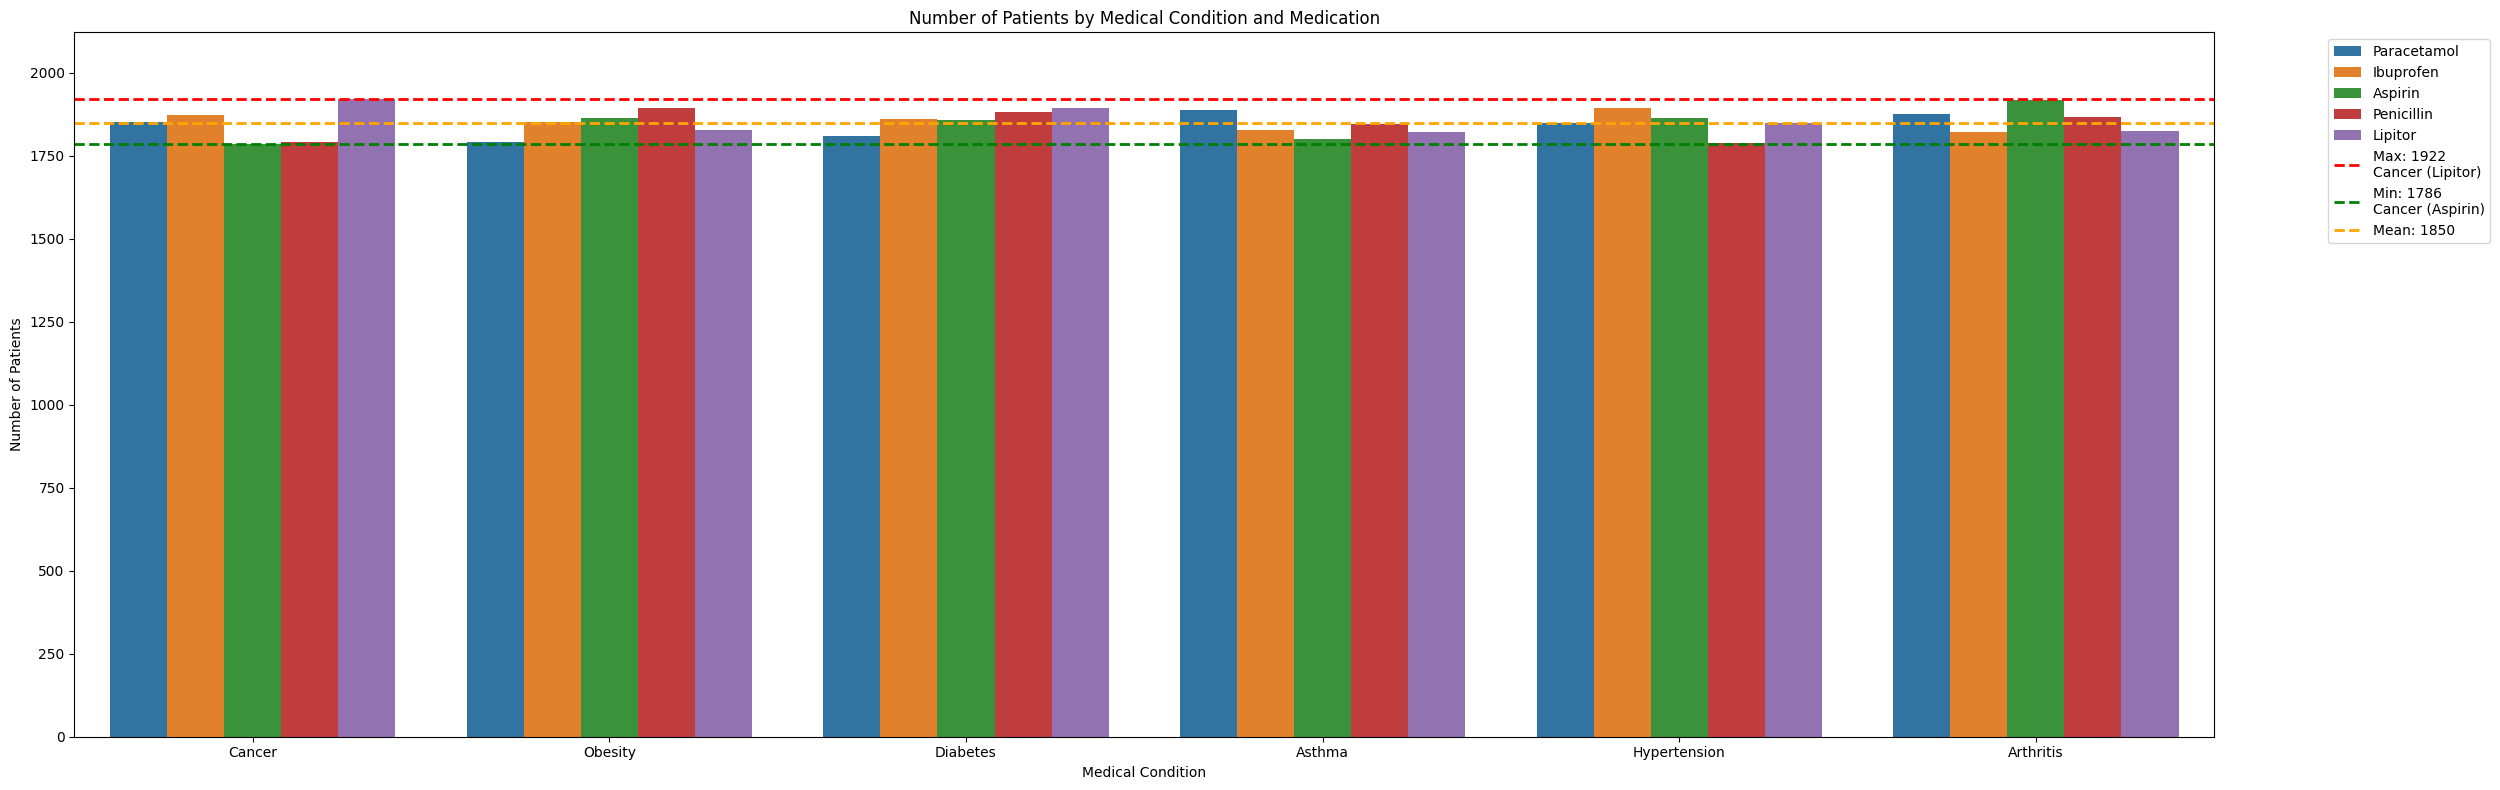

In [166]:
# Count patients by Medication + Medical Condition
medical_medication = (
    df.groupby(['Medication', 'Medical Condition'])
      .size()
      .reset_index(name='Patient_Count')
)

# Top 5 / Bottom 5 (optional)
top5 = medical_medication.sort_values(by='Patient_Count', ascending=False).head(5)
bottom5 = medical_medication.sort_values(by='Patient_Count', ascending=True).head(5)

# Mean – ambil dari DataFrame
mean_total = medical_medication['Patient_Count'].mean()

# Max & Min (semua tied)
max_total = medical_medication['Patient_Count'].max()
min_total = medical_medication['Patient_Count'].min()

max_rows = medical_medication[medical_medication['Patient_Count'] == max_total]
min_rows = medical_medication[medical_medication['Patient_Count'] == min_total]

# Function untuk wrap legend text selepas n items
def wrap_text(rows, n_items=2):
    text_lines = []
    for i in range(0, len(rows), n_items):
        chunk = rows.iloc[i:i+n_items]
        line = ", ".join([f"{row['Medical Condition']} ({row['Medication']})" for _, row in chunk.iterrows()])
        text_lines.append(line)
    return "\n".join(text_lines)

# Wrap legend text
max_text_wrapped = wrap_text(max_rows, n_items=2)
min_text_wrapped = wrap_text(min_rows, n_items=2)

# Plot chart
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='Medical Condition', hue='Medication', data=df)

# Bar heights
bar_heights = [p.get_height() for p in ax.patches]
max_bar_height = max(bar_heights)

# Minimum pakai nilai dari DataFrame supaya tepat dan nampak jelas
min_bar_height = min_total

# Mean – dari DataFrame
mean_bar_height = mean_total

# Tambah padding atas untuk max line supaya semua garis nampak
plt.ylim(0, max_bar_height + 200)

# Horizontal lines dengan wrapped legend
plt.axhline(max_bar_height, color='red', linestyle='--', linewidth=2,
            label=f"Max: {max_total}\n{max_text_wrapped}")

plt.axhline(min_bar_height, color='green', linestyle='--', linewidth=2,
            label=f"Min: {min_total}\n{min_text_wrapped}")

plt.axhline(mean_bar_height, color='orange', linestyle='--', linewidth=2,
            label=f"Mean: {mean_bar_height:.0f}")

# Title & labels
plt.title("Number of Patients by Medical Condition and Medication")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")

# Legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

Insights for Number of Patients by Medical Condition and Medication

  - The chart shows that the highest number of patients taking medication is 1,922, associated with Lipitor for the Cancer medical condition.
  - Conversely, the lowest number of patients using medication is 1,786, associated with Aspirin for the Cancer medical condition.
  - The mean number of patients across all medications used is approximately 1,850 patients.


In [167]:
#Save output
df.to_csv('healthcare_dataset_clean.csv',index=False)

In [168]:
from google.colab import files
files.download('healthcare_dataset_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>